# 🎯 INTRODUCTION GÉNÉRALE

## 📌 Contexte business

La fidélisation des clients est un enjeu stratégique majeur pour les entreprises opérant dans des secteurs fortement concurrentiels comme les télécommunications. Le **churn**, ou attrition client, désigne le fait qu’un client arrête de recourir aux services d’une entreprise. Cette perte de clientèle représente un coût important, souvent supérieur à celui de l’acquisition de nouveaux clients.

Dans ce contexte, anticiper les départs de clients permet à l’entreprise de mettre en œuvre des actions préventives de rétention ciblées.

## ❓ Problématique

Comment identifier à l'avance les clients susceptibles de résilier leur contrat, à partir des données disponibles sur leurs caractéristiques et comportements ?

## 🎯 Objectifs

- Identifier les variables les plus influentes dans le churn client.
- Construire un modèle de machine learning capable de prédire si un client est à risque de churn.
- Proposer des pistes d’action pour améliorer la rétention client.

## ✅ Résultats attendus

- Un modèle prédictif performant (ex. : avec une bonne précision et un bon rappel).
- Une compréhension claire des profils de clients à risque.
- Des recommandations stratégiques à partir des résultats.

## 🧪 Méthodologie

Le projet suivra une approche complète et rigoureuse :

1. **Préparation des données** : nettoyage, traitement des valeurs manquantes, détection et traitement des valeurs aberrantes ou extrêmes.
2. **Analyse exploratoire** : étude univariée et bivariée pour comprendre la distribution des variables et leur lien avec le churn.
3. **Préparation pour la modélisation** : encodage des variables catégorielles, normalisation/scaling, gestion du déséquilibre de classes (par exemple via SMOTE).
4. **Modélisation** : entraînement et évaluation de plusieurs modèles de machine learning, sélection du meilleur algorithme.
5. **Application du modèle sur de nouveaux clients** : prédiction de la probabilité de churn et classification des profils à risque.
6. **Stratégies marketing** : recommandations concrètes d'intervention en fonction du niveau de risque détecté.
7. **Conclusion et perspectives** : synthèse des résultats et axes potentiels d'amélioration.
8. **Déploiement d’une application Streamlit** : création d’une interface web interactive pour tester le modèle, simuler des profils clients, visualiser les prédictions et faciliter l’utilisation métier.

## 📂 Description du dataset

Le jeu de données utilisé est issu d’un opérateur de télécommunication. Il contient des informations sur les clients, leurs services souscrits, leurs habitudes de paiement et leur statut de churn.

- **Nombre d’observations** : 7 043 clients  
- **Variable cible** : `Churn` (`Yes` / `No`)  
- **Types de variables** :
  - **Démographiques** : genre, âge, statut marital, etc.
  - **Services** : Internet, téléphone, sécurité, etc.
  - **Paiements** : mode de paiement, mensualité, etc.


# 🛠 1. PRÉPARATION DES DONNÉES 

Avant toute modélisation ou visualisation, il est essentiel de préparer les données correctement. Cette étape permet de garantir la qualité, la cohérence et l’exploitabilité du dataset.

## 📥 1.1 Chargement et aperçu du dataset

Nous commençons par importer les bibliothèques nécessaires, charger le fichier CSV contenant les données clients et afficher les premières lignes du jeu de données.

🎯 **Objectifs** :
- Vérifier que le fichier est correctement chargé
- Identifier les types de variables (catégorielles, numériques, cible)
- Avoir un premier aperçu de la structure des données


In [69]:
# 1. Import des librairies
import os
os.listdir()

import pandas as pd

# 2. Chargement du dataset
df = pd.read_csv("Telco-Customer-Churn.csv")


# 3. Aperçu du dataset
print("Shape :", df.shape)
print(df.head())
print(df.dtypes)


Shape : (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies  

## 🧹 1.2 Nettoyage des données

Avant toute analyse, il est essentiel de nettoyer le dataset afin d'assurer la qualité et la cohérence des informations. Nous allons ici identifier et corriger les anomalies courantes.



### 🔁 Doublons
Détection et suppression des lignes dupliquées pour éviter des biais dans les statistiques et les modèles.


In [70]:
# Vérification des doublons
print(f"Nombre de doublons : {df.duplicated().sum()}")

Nombre de doublons : 0


### 🔁 Suppression des doublons
Aucun doublon n’a été détecté dans le dataset . Aucune suppression n’est nécessaire à cette étape.


### ⚠️ Incohérences
Recherche et correction de valeurs incohérentes ou mal saisies, comme :
- `'No internet service'` dans des colonnes où Internet n’est pas concerné
- Valeurs absurdes ou ininterprétables


In [71]:
# Liste des colonnes liées à Internet (peuvent contenir 'No internet service')
cols_internet = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Colonne liée à la téléphonie (peut contenir 'No phone service')
cols_phone = ['MultipleLines']

# Concaténation des deux listes
cols_to_check = cols_internet + cols_phone

# Affichage des valeurs uniques dans chaque colonne
print("📊 Analyse des anomalies dans les colonnes liées aux services\n")
for col in cols_to_check:
    print(f"--- {col} ---")
    print(df[col].value_counts(dropna=False))
    print("\n")


📊 Analyse des anomalies dans les colonnes liées aux services

--- OnlineSecurity ---
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


--- OnlineBackup ---
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


--- DeviceProtection ---
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


--- TechSupport ---
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


--- StreamingTV ---
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


--- StreamingMovies ---
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


--- MultipleLines ---
MultipleLines
No          

### 📊 Analyse des anomalies dans les colonnes liées aux services

Les résultats ci-dessous montrent les modalités présentes dans les variables liées aux services Internet et téléphoniques. Ils permettent d’identifier des valeurs incohérentes ou redondantes comme `"No internet service"` ou `"No phone service"`.

---

#### 🌐 Colonnes liées à l’Internet :
Les colonnes suivantes sont conditionnelles à la souscription d’un service Internet :

- `OnlineSecurity`
- `OnlineBackup`
- `DeviceProtection`
- `TechSupport`
- `StreamingTV`
- `StreamingMovies`

Dans chacune d'elles, on observe **exactement 1 526 occurrences de la modalité `"No internet service"`**. Cela signifie que ces clients **n’ont pas souscrit à un service Internet**, et donc les services associés (sécurité, backup, streaming...) ne s’appliquent pas.

📌 **Remarque** : La valeur `"No internet service"` peut être remplacée par `"No"` pour simplifier et standardiser l’analyse, car l’absence de service Internet implique bien l'absence des services associés.

---

#### ☎️ Colonne liée à la téléphonie :
- `MultipleLines` décrit si un client a plusieurs lignes téléphoniques. Or, **682 clients** ont `"No phone service"`, indiquant qu’ils n’ont pas de service téléphonique.

📌 **Remarque** : Comme pour Internet, la valeur `"No phone service"` peut aussi être remplacée par `"No"` afin de rester cohérent et de faciliter l'encodage plus tard.

---

### ✅ Conclusion :
Les modalités `"No internet service"` et `"No phone service"` représentent des **valeurs fonctionnelles mais redondantes**. Leur standardisation est une bonne pratique pour :
- Réduire le nombre de modalités par variable
- Éviter des encodages incorrects ou ambigus
- Faciliter l’analyse exploratoire et la modélisation


In [72]:
# ✅ Correction des valeurs incohérentes dans les colonnes liées aux services

# Colonnes où l'on remplace 'No internet service' par 'No'
cols_internet = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_internet:
    df[col] = df[col].replace('No internet service', 'No')

# Colonne où l'on remplace 'No phone service' par 'No'
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

print("✅ Remplacement des valeurs incohérentes terminé.")
# 🔍 Affichage des valeurs APRÈS correction
print("📊 APRÈS correction :")
for col in cols_internet:
    print(f"--- {col} ---")
    print(df[col].value_counts(dropna=False))
    print("\n")

print("--- MultipleLines ---")
print(df['MultipleLines'].value_counts(dropna=False))


✅ Remplacement des valeurs incohérentes terminé.
📊 APRÈS correction :
--- OnlineSecurity ---
OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64


--- OnlineBackup ---
OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64


--- DeviceProtection ---
DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64


--- TechSupport ---
TechSupport
No     4999
Yes    2044
Name: count, dtype: int64


--- StreamingTV ---
StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64


--- StreamingMovies ---
StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64


--- MultipleLines ---
MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64


### ✅ Vérification des données après correction des valeurs incohérentes

Suite à la suppression des valeurs comme `'No internet service'` et `'No phone service'`, nous avons standardisé les colonnes concernées pour ne garder que des réponses binaires claires : `'Yes'` ou `'No'`.

📊 Voici un aperçu des distributions **après correction** :

- `OnlineSecurity` :  
  - **No** : 5024  
  - **Yes** : 2019  

- `OnlineBackup` :  
  - **No** : 4614  
  - **Yes** : 2429  

- `DeviceProtection` :  
  - **No** : 4621  
  - **Yes** : 2422  

- `TechSupport` :  
  - **No** : 4999  
  - **Yes** : 2044  

- `StreamingTV` :  
  - **No** : 4336  
  - **Yes** : 2707  

- `StreamingMovies` :  
  - **No** : 4311  
  - **Yes** : 2732  

- `MultipleLines` :  
  - **No** : 4072  
  - **Yes** : 2971  

✅ **Interprétation** :
- Toutes les colonnes présentent désormais des modalités **cohérentes et standardisées**.
- Il n’y a **plus de valeurs ambiguës** comme `'No internet service'` ou `'No phone service'`.
- Cela facilite l’analyse statistique, l’encodage, et l’entraînement des modèles de machine learning.

👉 Cette étape est cruciale pour garantir la qualité des données avant toute modélisation.


### verification des types de variables et correction 

In [73]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### 🔎 Analyse des types

| Variable             | Type actuel | Interprétation attendue                                  |
|----------------------|-------------|-----------------------------------------------------------|
| `customerID`         | `object`    | Identifiant (non modélisable)                            |
| `gender` à `PaymentMethod` | `object`    | Variables **catégorielles**                              |
| `SeniorCitizen`      | `int64`     | Variable **binaire (0/1)** → à convertir en `object`     |
| `tenure`             | `int64`     | Variable **numérique continue**                          |
| `MonthlyCharges`     | `float64`   | Variable **numérique continue**                          |
| `TotalCharges`       | `object`    | Devrait être **numérique** (probablement conversion nécessaire) |
| `Churn`              | `object`    | Variable **cible** (catégorielle binaire : `Yes` / `No`) |

---

### ⚠️ Points à corriger :

- `TotalCharges` est typée comme `object`, ce qui est incorrect. Elle contient probablement des valeurs **vides** ou **mal saisies**, ce qui empêche sa conversion automatique. Il faut :
  - Identifier les valeurs problématiques
  - Les traiter (par exemple, remplacer les vides)
  - Puis convertir en `float`

- `SeniorCitizen` est codée en `int64`, alors qu'il s'agit d'une **variable binaire** (0 = non senior, 1 = senior). Pour les analyses **catégorielles**, il est préférable de la convertir en `object`.

---

✅ Ces corrections sont **essentielles** pour garantir une bonne séparation entre variables **numériques** et **catégorielles**, ce qui facilitera les prochaines étapes de :
- l’analyse exploratoire (EDA)
- la préparation des données pour la modélisation.


In [74]:
### ✅ Correction des types de variables

# Remplacer les valeurs vides dans 'TotalCharges' par NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Vérification du nombre de valeurs manquantes après conversion
print("Valeurs manquantes dans 'TotalCharges' après conversion :", df['TotalCharges'].isna().sum())
# Conversion finale en float
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Conversion de 'SeniorCitizen' en objet catégoriel
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

# Afficher les types finaux
print(df.dtypes)

Valeurs manquantes dans 'TotalCharges' après conversion : 11
customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


### 🔍 Vérification et correction des types de variables

Après conversion des types, voici les points importants :

- ✅ **`TotalCharges`** a été convertie en `float64` : initialement de type `object`, cette variable contenait des valeurs numériques enregistrées sous forme de texte. La conversion a révélé **11 valeurs manquantes**, probablement dues à des cellules vides ou des espaces. 
  
- ✅ **`SeniorCitizen`** a été convertie de `int64` à `object` : bien qu’elle prenne les valeurs `0` ou `1`, cette variable représente une **caractéristique catégorielle** (est ou n’est pas senior). Son traitement en tant que variable qualitative est donc plus adapté pour les analyses exploratoires et la modélisation.

- ✅ Les autres variables ont des types cohérents :
  - **Variables numériques** : `tenure`, `MonthlyCharges`, `TotalCharges`
  - **Variables catégorielles** (object) : toutes les autres, y compris `Churn` (la variable cible)

🎯 Ces corrections garantissent que chaque variable sera correctement interprétée lors de l'analyse statistique et de l'entraînement des modèles.


### 🧹 Suppression de la variable `customerID`

La variable `customerID` est un **identifiant unique** attribué à chaque client. Elle ne contient **aucune information utile** pour l’analyse statistique ou pour entraîner un modèle de machine learning, car :

- Elle n’a **aucune relation** avec la variable cible `Churn`
- Elle pourrait **introduire du bruit** dans certains algorithmes (notamment les modèles sensibles aux colonnes non informatives)
- Elle ne contribue **ni à la segmentation client** ni à la prédiction

✅ Il est donc préférable de la **supprimer dès cette étape de préparation des données**.


In [75]:
# Suppression de la colonne customerID
df.drop(columns='customerID', inplace=True)
print("✅ Colonne 'customerID' supprimée.")

✅ Colonne 'customerID' supprimée.


### 🗂 Description du dataset (Dictionnaire des variables)

| Variable           | Description                                                                 | Type                |
|--------------------|------------------------------------------------------------------------------|---------------------|
| `gender`           | Sexe du client (Male / Female)                                               | Catégorielle        |
| `SeniorCitizen`    | Indique si le client est un senior (1 = Oui, 0 = Non)                        | Binaire (object)    |
| `Partner`          | Le client a-t-il un partenaire (Yes / No)                                    | Binaire             |
| `Dependents`       | Le client a-t-il des personnes à charge (Yes / No)                           | Binaire             |
| `tenure`           | Nombre de mois de présence chez l’opérateur                                  | Numérique continue  |
| `PhoneService`     | Le client dispose-t-il d’un service de téléphonie (Yes / No)                 | Binaire             |
| `MultipleLines`    | Le client a-t-il plusieurs lignes téléphoniques (Yes / No)                   | Binaire             |
| `InternetService`  | Type de service Internet (DSL / Fiber optic / No)                            | Catégorielle        |
| `OnlineSecurity`   | Sécurité en ligne (Yes / No)                                                 | Binaire             |
| `OnlineBackup`     | Sauvegarde en ligne (Yes / No)                                               | Binaire             |
| `DeviceProtection` | Protection de l’équipement (Yes / No)                                        | Binaire             |
| `TechSupport`      | Assistance technique (Yes / No)                                              | Binaire             |
| `StreamingTV`      | Accès au service de streaming TV (Yes / No)                                  | Binaire             |
| `StreamingMovies`  | Accès aux films en streaming (Yes / No)                                      | Binaire             |
| `Contract`         | Type de contrat (Month-to-month / One year / Two year)                       | Catégorielle        |
| `PaperlessBilling` | Facturation sans papier (Yes / No)                                           | Binaire             |
| `PaymentMethod`    | Méthode de paiement utilisée                                                 | Catégorielle        |
| `MonthlyCharges`   | Montant mensuel facturé                                                      | Numérique continue  |
| `TotalCharges`     | Montant total facturé depuis le début                                        | Numérique continue  |
| `Churn`            | Variable cible : le client a-t-il résilié son contrat ? (Yes / No)           | Cible binaire       |

📝 Ce dictionnaire reflète l’état , cohérent du dataset. Il servira de **référence centrale** pour l’ensemble des étapes d’exploration, de modélisation et de visualisation.


## 🧼 1.3 Traitement des valeurs manquantes

La présence de valeurs manquantes dans un dataset peut biaiser les résultats de nos analyses statistiques et modèles de machine learning. Il est donc indispensable de les détecter, les quantifier, et adopter une stratégie de traitement adaptée.

Dans ce projet, nous allons :
- Rechercher les cellules manquantes dans toutes les colonnes.
- Examiner les valeurs manquantes dans `TotalCharges`, souvent encodées comme des chaînes vides.
- Corriger ou supprimer ces entrées selon leur impact.


In [76]:
import pandas as pd

# Taille initiale du dataset
print(f"Dimensions du dataset : {df.shape}")

# Vérification des types de données
print("\nTypes de données :")
print(df.dtypes)

# Affichage des valeurs manquantes après conversion
print("\nValeurs manquantes :")
print(df.isnull().sum())

# Dimensions après conversion (sans suppression des NaN)
print(f"\nDimensions du dataset  : {df.shape}")


Dimensions du dataset : (7043, 20)

Types de données :
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Valeurs manquantes :
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
Pape

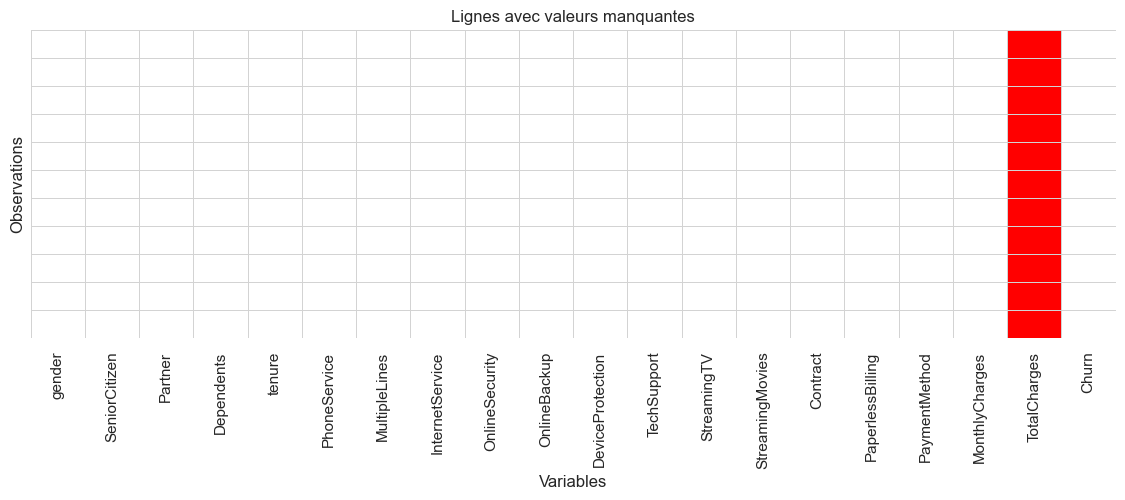

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Affichage de la heatmap des lignes avec valeurs manquantes (sans utiliser une variable intermédiaire)
plt.figure(figsize=(14, 4))
sns.heatmap(df.isnull()[df.isnull().any(axis=1)],
            cmap=sns.color_palette(["white", "red"]),
            cbar=False,
            yticklabels=False,
            linewidths=0.5,
            linecolor='lightgrey')

plt.title("Lignes avec valeurs manquantes")
plt.xlabel("Variables")
plt.ylabel("Observations")
plt.show()


### 🔄 Suppression des valeurs manquantes

Nous avons décidé de supprimer les lignes contenant des valeurs manquantes. Comme seules 11 lignes étaient concernées (dans la colonne `TotalCharges`), cette opération n'entraîne pas de perte significative d'information.

Nous vérifions ensuite que le DataFrame ne contient plus aucune valeur manquante.


In [78]:
# 🔥 Suppression des lignes contenant des valeurs manquantes
print("Dimensions avant suppression :", df.shape)
df = df.dropna()
print("Dimensions après suppression :", df.shape)

# Vérification
print("\n✅ Toutes les valeurs manquantes ont été supprimées.")
print(df.isnull().sum())


Dimensions avant suppression : (7043, 20)
Dimensions après suppression : (7032, 20)

✅ Toutes les valeurs manquantes ont été supprimées.
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Un nettoyage rigoureux des données est indispensable avant toute analyse ou modélisation. Une des premières étapes consiste à identifier et traiter les **valeurs manquantes**, qui peuvent fausser les résultats statistiques ou dégrader les performances des modèles prédictifs.

#### 🔍 Bilan initial

- Dimensions initiales du dataset : **(7043, 21)**
- Nombre de valeurs manquantes par variable :
  - Aucune colonne ne comporte de `NaN` directement détectés.
  - Toutefois, la variable `TotalCharges`, bien que de type *object*, contient **11 valeurs vides** sous forme de chaînes (`""`), ce qui nécessite une vérification plus fine.

#### ⚙️ Méthode utilisée

1. **Conversion de `TotalCharges` en float** :  
   Nous avons converti cette colonne de `object` vers `float`, en forçant les erreurs (`errors='coerce'`). Les chaînes vides sont ainsi devenues des `NaN`.

2. **Quantification des valeurs manquantes** :
   Après conversion, la colonne `TotalCharges` présentait **11 valeurs manquantes**.

3. **Suppression des lignes incomplètes** :  
   Étant donné le faible nombre d’observations concernées (11 lignes sur 7043, soit ~0,15%), nous avons choisi de les **supprimer**, car leur traitement n’impacte pas significativement le volume global des données.

#### ✅ Bilan final

- Dimensions finales du dataset après nettoyage : **(7032, 21)**
- Toutes les valeurs manquantes ont été **traitées** avec succès.

Cette étape garantit que notre dataset est **complet** et **cohérent** pour les analyses futures.


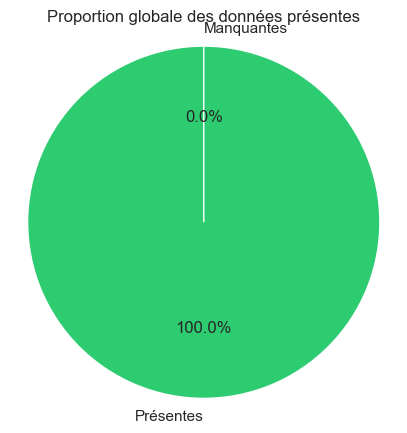

In [79]:
# Total de cellules
total_cells = df.size

# Total de valeurs manquantes
total_missing = df.isnull().sum().sum()

# Données pour le pie chart
labels = ['Présentes', 'Manquantes']
sizes = [total_cells - total_missing, total_missing]
colors = ['#2ecc71', '#e74c3c']

# Plot
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Proportion globale des données présentes")  # Titre sans emoji
plt.axis('equal')  # Cercle parfait
plt.show()


## 📦 1.4 Traitement des outliers

Nous analysons les valeurs aberrantes potentielles dans les variables numériques continues : `tenure`, `MonthlyCharges` et `TotalCharges`.

Les boxplots permettent d’identifier visuellement les points extrêmes situés en dehors des moustaches (valeurs atypiques).


In [80]:
# 🔹 Sélection des variables numériques continues (hors SeniorCitizen qui est binaire)
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# 🔎 Détection des outliers avec la méthode IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# 🔹 Résumé du nombre d'outliers par variable
for col in num_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col} : {len(outliers)} outliers détectés")


tenure : 0 outliers détectés
MonthlyCharges : 0 outliers détectés
TotalCharges : 0 outliers détectés


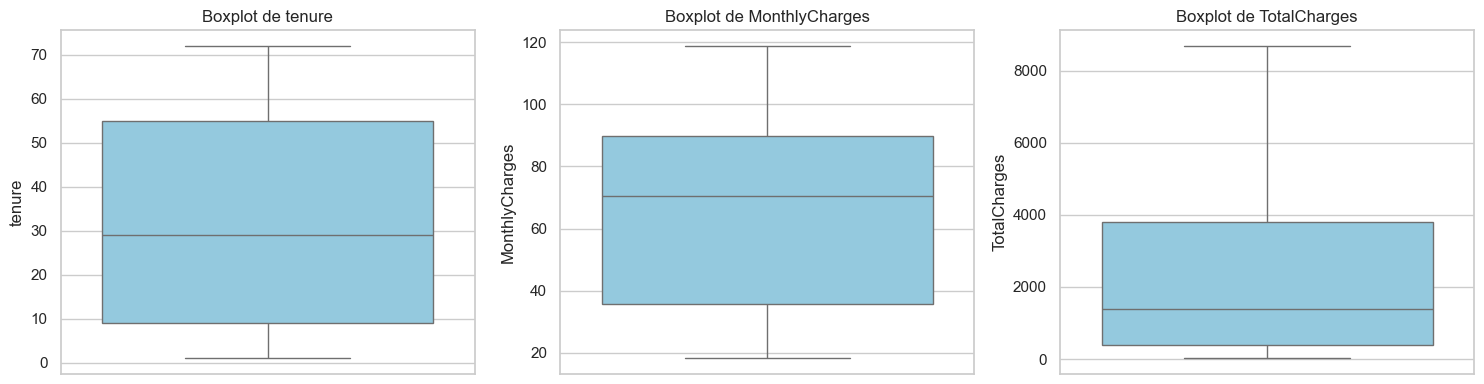

In [81]:
# 🔹 Sélection des variables numériques continues (hors SeniorCitizen qui est binaire)
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# 🔹 Affichage des boxplots pour détecter les outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))

for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()


Des **boxplots** ont été générés pour chacune de ces variables afin de visualiser la présence de valeurs extrêmes. Les **outliers** sont généralement situés en dehors des moustaches (définies statistiquement par l’intervalle [Q1 - 1.5×IQR ; Q3 + 1.5×IQR]).

#### 🔍 Résultat

> 📌 Les boxplots des variables numériques (`tenure`, `MonthlyCharges`, `TotalCharges`) ne révèlent pas de valeurs aberrantes significatives. Aucune action de traitement des outliers n'est nécessaire à ce stade.

Cette vérification garantit que les variables numériques sont **propres et prêtes** pour les analyses statistiques et les modélisations à venir.


## 📊 2. ANALYSE EXPLORATOIRE DES DONNÉES (EDA)

Dans cette section, nous allons explorer les principales caractéristiques du dataset afin de mieux comprendre la structure des données, identifier les relations potentielles entre les variables, et orienter les choix de modélisation.

L'analyse exploratoire sera structurée en deux étapes :

- **2.1 Analyse univariée** : Étude descriptive de chaque variable indépendamment, à travers des statistiques de base et des visualisations (histogrammes, diagrammes en barres…).
- **2.2 Analyse bivariée** : Étude des relations entre les variables explicatives et la variable cible (`Churn`), ainsi qu'entre variables explicatives.

> Objectif : détecter des tendances, patterns ou anomalies qui pourraient enrichir la modélisation prédictive.


### 📈 2.1 Analyse univariée

L’analyse univariée permet d’examiner chaque variable indépendamment afin de comprendre sa distribution, sa nature (quantitative ou qualitative), ainsi que la présence éventuelle d’anomalies ou de déséquilibres.

Nous allons distinguer deux types de variables :

- **Variables numériques** : `tenure`, `MonthlyCharges`, `TotalCharges`
- **Variables qualitatives** : `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaperlessBilling`, `PaymentMethod`, `Churn`


> Objectif : repérer les distributions particulières, les déséquilibres de classes, et les insights préliminaires utiles pour la suite de l’analyse.


### 🔍2.1.1 Analyse univariée des variables numériques : Statistiques descriptives

Dans cette section, nous allons explorer les variables **numériques** individuellement afin de comprendre leur distribution, leur tendance centrale et leur dispersion.

Les variables numériques considérées sont :

- `tenure` : ancienneté du client (en mois),
- `MonthlyCharges` : montant mensuel payé par le client,
- `TotalCharges` : montant total payé par le client depuis le début.

Pour chaque variable, nous présenterons :

- des **statistiques descriptives** : minimum, maximum, moyenne, médiane, écart-type, variance, coefficient d'asymétrie (skewness), coefficient d'aplatissement (kurtosis), etc.
- des **interprétations** : pour identifier les distributions symétriques ou asymétriques, aplaties ou concentrées.

> L’objectif est d’identifier d’éventuelles anomalies, des valeurs extrêmes ou des déséquilibres importants dans la distribution de ces variables.


In [82]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, variation

def statistiques_numeriques(df, variables_numeriques):
    resume_stats = []

    for col in variables_numeriques:
        data = df[col].dropna()
        resume = {
            'Variable': col,
            'Minimum': np.min(data),
            'Maximum': np.max(data),
            'Mode': data.mode().iloc[0] if not data.mode().empty else np.nan,
            'Médiane': np.median(data),
            'Moyenne': np.mean(data),
            '1er quartile': np.percentile(data, 25),
            '3e quartile': np.percentile(data, 75),
            'Écart interquartile': np.percentile(data, 75) - np.percentile(data, 25),
            'Écart-type': np.std(data, ddof=1),
            'Variance': np.var(data, ddof=1),
            'Coefficient variation': variation(data),
            'Skewness': skew(data),
            'Skew (interprétation)': 'Étendue à gauche' if skew(data) < 0 else 'Étendue à droite',
            'Kurtosis': kurtosis(data),
            'Kurtosis (interprétation)': 'Platikurtique' if kurtosis(data) < 3 else 'Leptokurtique'
        }
        resume_stats.append(resume)

    return pd.DataFrame(resume_stats)
variables_numeriques = ['tenure', 'MonthlyCharges', 'TotalCharges']
statistiques_numeriques(df, variables_numeriques)

,Variable,Minimum,Maximum,Mode,Médiane,Moyenne,1er quartile,3e quartile,Écart interquartile,Écart-type,Variance,Coefficient variation,Skewness,Skew (interprétation),Kurtosis,Kurtosis (interprétation)
0,tenure,1.00,72.00,1.00,29.000,32.421786,9.0000,55.0000,46.0000,24.545260,6.024698e+02,0.757007,0.237680,Étendue à droite,-1.387689,Platikurtique
1,MonthlyCharges,18.25,118.75,20.05,70.350,64.798208,35.5875,89.8625,54.2750,30.085974,9.051658e+02,0.464270,-0.222056,Étendue à gauche,-1.256117,Platikurtique
2,TotalCharges,18.80,8684.80,20.20,1397.475,2283.300441,401.4500,3794.7375,3393.2875,2266.771362,5.138252e+06,0.992690,0.961437,Étendue à droite,-0.232487,Platikurtique


### 📊 Interprétation des statistiques descriptives des variables numériques

Voici l’analyse des principales statistiques pour les trois variables numériques du jeu de données.

#### 🔹 `tenure` (ancienneté du client en mois)
- **Minimum :** 1 mois — **Maximum :** 72 mois  
- **Médiane :** 29 mois — **Moyenne :** 32,42 mois  
- **Mode :** 1 → beaucoup de clients sont très récents  
- **Asymétrie (skewness) :** 0,76 > 0 → **distribution étendue à droite**  
- **Kurtosis :** -1,39 < 3 → **distribution platikurtique**, plus aplatie que la normale  
- ✅ **Conclusion :** La majorité des clients sont récents, mais une minorité fidèle est présente, avec une queue à droite.

#### 🔹 `MonthlyCharges` (montant mensuel facturé)
- **Minimum :** 18,25 € — **Maximum :** 118,75 €  
- **Médiane :** 70,35 € — **Moyenne :** 64,80 €  
- **Mode :** 20,05 €  
- **Asymétrie :** -0,22 < 0 → **distribution légèrement étendue à gauche**  
- **Kurtosis :** -1,26 < 3 → **distribution platikurtique**  
- ✅ **Conclusion :** Les factures mensuelles sont modérément réparties avec une concentration légèrement plus élevée vers les faibles montants.

#### 🔹 `TotalCharges` (montant total facturé)
- **Minimum :** 18,80 € — **Maximum :** 8684,80 €  
- **Médiane :** 1397,48 € — **Moyenne :** 2283,30 €  
- **Asymétrie :** 0,96 > 0 → **distribution étendue à droite**  
- **Kurtosis :** -0,23 < 3 → **distribution platikurtique**  
- ✅ **Conclusion :** Distribution très dispersée, avec des clients ayant payé des montants élevés (forte ancienneté). Queue longue à droite typique des clients fidèles.

> 📌 Ces variables présentent des distributions **asymétriques** et **non normales**, ce qui devra être pris en compte dans le choix des méthodes statistiques ou algorithmes de machine learning à venir.


### 📈 2.1.2 Analyse univariée des variables numériques : visualisations

Pour mieux comprendre la distribution de chaque variable numérique, nous utilisons des visualisations graphiques complémentaires générées par la fonction personnalisée `plot_variable_distribution()`. Cette fonction produit **trois types de graphiques adaptés aux variables continues** :

- 📉 **Histogramme avec courbe de densité** : permet de visualiser la forme générale de la distribution (symétrie, aplatissement, concentration…).
- 📈 **Polygone des fréquences cumulées (ECDF)** : permet d’observer la proportion cumulative des individus, utile pour localiser la médiane, les quartiles et détecter des effets de seuil.
- 📦 **Boîte à moustaches (boxplot)** : met en évidence la dispersion des données, la position de la médiane, et les éventuelles valeurs extrêmes (outliers).

Les variables numériques analysées sont :

- `tenure` (ancienneté en mois)
- `MonthlyCharges` (montant mensuel facturé)
- `TotalCharges` (montant total facturé depuis le début)

> L’objectif est de détecter la forme de chaque distribution (asymétrie, aplatissement, présence d’outliers) afin d’orienter les choix de transformation des données ou les méthodes statistiques/machine learning à utiliser par la suite.


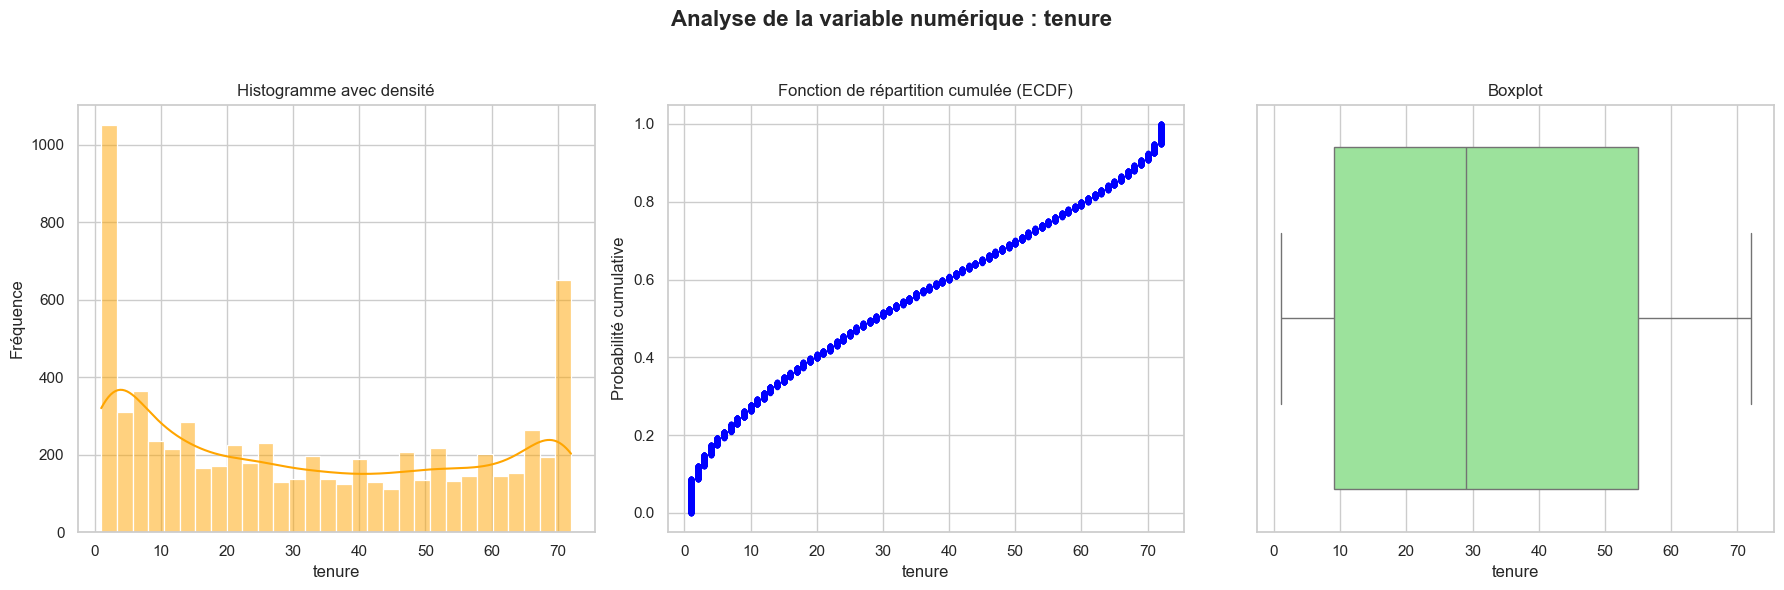

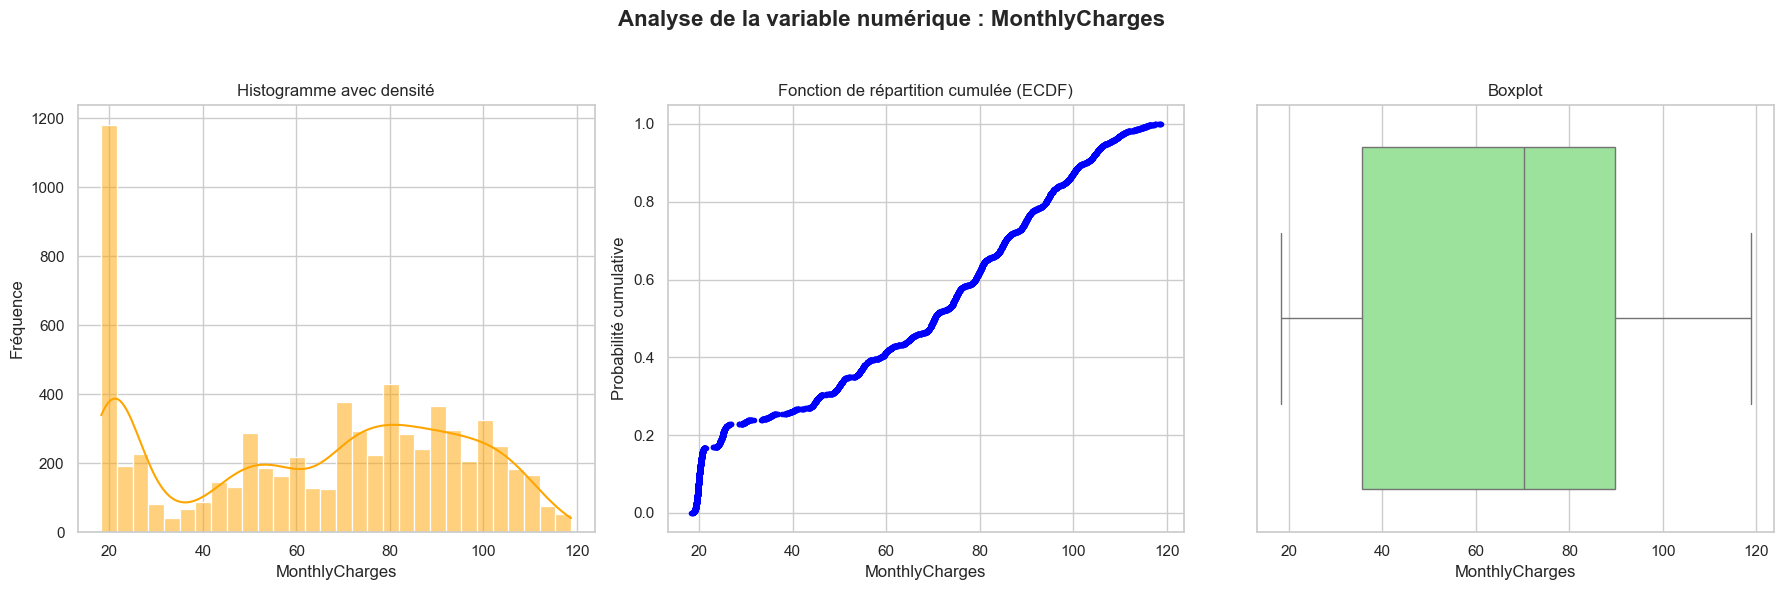

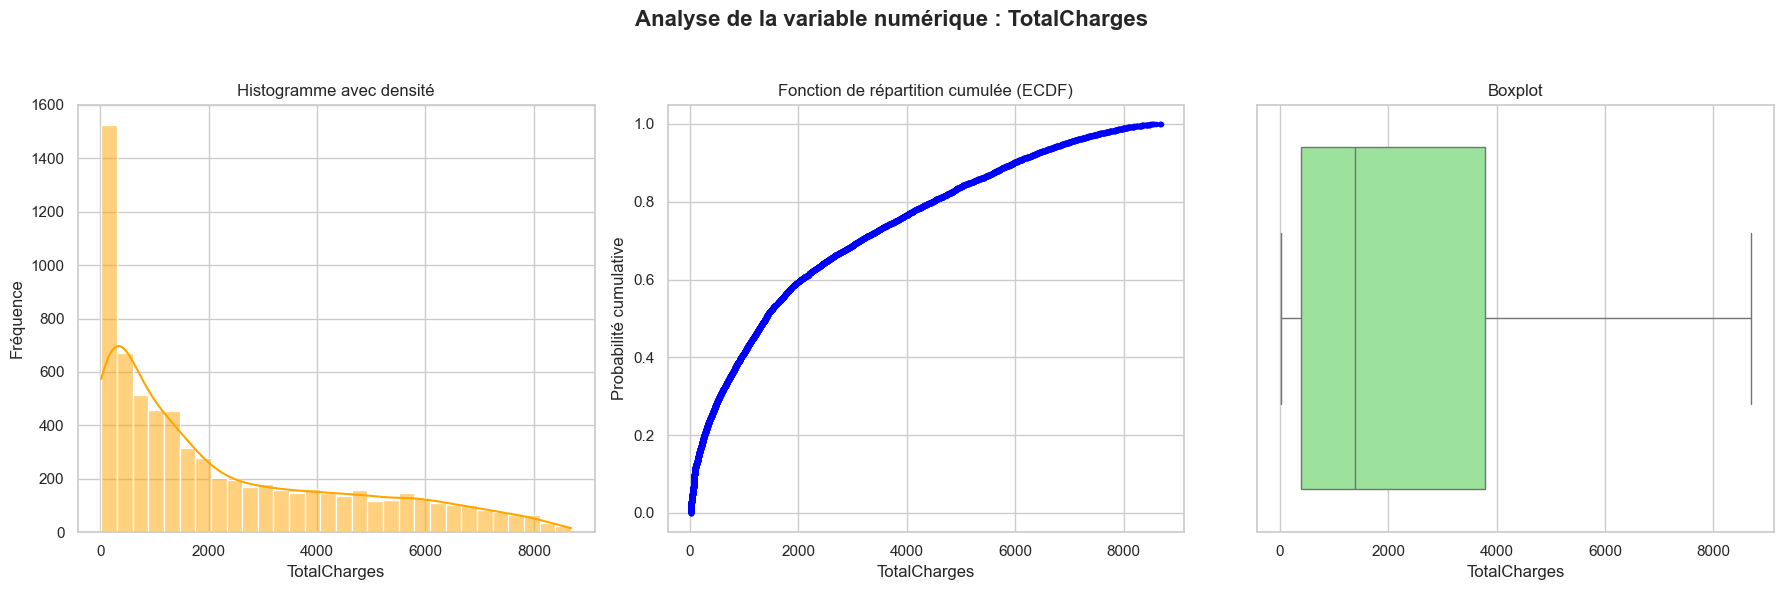

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF

# Fonction mise à jour SANS emojis dans les titres
def plot_variable_distribution(df, col):
    data = df[col].dropna()

    plt.figure(figsize=(18, 6))
    plt.suptitle(f"Analyse de la variable numérique : {col}", fontsize=16, fontweight='bold')

    # Histogramme avec densité
    plt.subplot(1, 3, 1)
    sns.histplot(data, kde=True, color='orange', bins=30)
    plt.title("Histogramme avec densité")
    plt.xlabel(col)
    plt.ylabel("Fréquence")

    # ECDF
    plt.subplot(1, 3, 2)
    ecdf = ECDF(data)
    plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='none', color='blue')
    plt.title("Fonction de répartition cumulée (ECDF)")
    plt.xlabel(col)
    plt.ylabel("Probabilité cumulative")
    plt.grid(True)

    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=data, color='lightgreen')
    plt.title("Boxplot")
    plt.xlabel(col)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Liste des variables numériques à analyser
variables_numeriques = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Application de la fonction à chaque variable
for var in variables_numeriques:
    plot_variable_distribution(df, var)


### 🔍 2.1.3 Analyse univariée des variables qualitatives : Statistiques descriptives

Dans cette section, nous explorons chaque **variable qualitative** de manière individuelle afin de comprendre la distribution des modalités et leur poids relatif dans l’échantillon.

Parmi les variables qualitatives analysées, on retrouve notamment :

- `gender` : genre du client,
- `Partner` : le client vit-il en couple,
- `Contract` : type de contrat souscrit (mensuel, un an, deux ans),
- etc.

Pour chaque variable, nous appliquons la fonction personnalisée `sidoine.ql.tableau()` qui permet de générer un **tableau de fréquences**, comportant :

- 📌 **Effectifs** : nombre d’observations par modalité (fréquences absolues),
- 📌 **Fréquences relatives** : proportion de chaque modalité dans l’échantillon (%).

Ce tableau permet d’identifier rapidement :

- les **modalités dominantes** ou sous-représentées,
- les éventuels **déséquilibres de classes**,
- les variables **potentiellement discriminantes** pour la modélisation du churn.

> Ces statistiques descriptives constituent une première étape essentielle pour orienter les choix d’analyse bivariée et prédictive ultérieurs.


In [84]:
import pandas as pd

def tableau_qualitatif(df, variables_qualitatives):
    """
    Affiche les tableaux d'effectifs et de fréquences pour toutes les variables qualitatives.

    Paramètres :
    - df : DataFrame contenant les données
    - variables_qualitatives : liste des noms de colonnes qualitatives
    """
    for col in variables_qualitatives:
        print(f"\n📊 Variable : {col}")
        effectif = df[col].value_counts()
        frequence = df[col].value_counts(normalize=True).round(4)
        
        tableau = pd.DataFrame({
            "Modalité": effectif.index,
            "Effectif": effectif.values,
            "Fréquence": frequence.values
        })
        
        display(tableau)  # Affiche joliment le DataFrame dans un notebook Jupyter
# Liste de variables qualitatives à analyser
variables_qualitatives = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                          'PhoneService', 'MultipleLines', 'InternetService', 
                          'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                          'TechSupport', 'StreamingTV', 'StreamingMovies', 
                          'Contract', 'PaperlessBilling', 'PaymentMethod']

# Appel de la fonction
tableau_qualitatif(df, variables_qualitatives)



📊 Variable : gender


,Modalité,Effectif,Fréquence
0,Male,3549,0.5047
1,Female,3483,0.4953



📊 Variable : SeniorCitizen


,Modalité,Effectif,Fréquence
0,0,5890,0.8376
1,1,1142,0.1624



📊 Variable : Partner


,Modalité,Effectif,Fréquence
0,No,3639,0.5175
1,Yes,3393,0.4825



📊 Variable : Dependents


,Modalité,Effectif,Fréquence
0,No,4933,0.7015
1,Yes,2099,0.2985



📊 Variable : PhoneService


,Modalité,Effectif,Fréquence
0,Yes,6352,0.9033
1,No,680,0.0967



📊 Variable : MultipleLines


,Modalité,Effectif,Fréquence
0,No,4065,0.5781
1,Yes,2967,0.4219



📊 Variable : InternetService


,Modalité,Effectif,Fréquence
0,Fiber optic,3096,0.4403
1,DSL,2416,0.3436
2,No,1520,0.2162



📊 Variable : OnlineSecurity


,Modalité,Effectif,Fréquence
0,No,5017,0.7135
1,Yes,2015,0.2865



📊 Variable : OnlineBackup


,Modalité,Effectif,Fréquence
0,No,4607,0.6551
1,Yes,2425,0.3449



📊 Variable : DeviceProtection


,Modalité,Effectif,Fréquence
0,No,4614,0.6561
1,Yes,2418,0.3439



📊 Variable : TechSupport


,Modalité,Effectif,Fréquence
0,No,4992,0.7099
1,Yes,2040,0.2901



📊 Variable : StreamingTV


,Modalité,Effectif,Fréquence
0,No,4329,0.6156
1,Yes,2703,0.3844



📊 Variable : StreamingMovies


,Modalité,Effectif,Fréquence
0,No,4301,0.6116
1,Yes,2731,0.3884



📊 Variable : Contract


,Modalité,Effectif,Fréquence
0,Month-to-month,3875,0.5511
1,Two year,1685,0.2396
2,One year,1472,0.2093



📊 Variable : PaperlessBilling


,Modalité,Effectif,Fréquence
0,Yes,4168,0.5927
1,No,2864,0.4073



📊 Variable : PaymentMethod


,Modalité,Effectif,Fréquence
0,Electronic check,2365,0.3363
1,Mailed check,1604,0.2281
2,Bank transfer (automatic),1542,0.2193
3,Credit card (automatic),1521,0.2163


### 📊 Interprétation des variables catégorielles

Nous avons analysé la répartition de chaque **variable qualitative** à l’aide de tableaux d’effectifs et de fréquences. Cela permet d’identifier les modalités dominantes, les déséquilibres potentiels et d’orienter les choix pour la future modélisation du churn.

---

#### 🔹 `gender` (Genre du client)
- Répartition très équilibrée : **Male** (50,5%) et **Female** (49,5%).
- Cela implique qu’aucun **biais de genre** significatif n'est présent dans l’échantillon.

#### 🔹 `SeniorCitizen` (Client âgé de plus de 65 ans)
- Seuls **16,2%** des clients sont des seniors contre **83,8%** de non-seniors.
- Forte **sous-représentation** des personnes âgées dans l’échantillon.

#### 🔹 `Partner` (Vit en couple)
- Légère majorité de clients **sans partenaire** (51,8%).
- Peut influencer la stabilité ou l'engagement client.

#### 🔹 `Dependents` (A des personnes à charge)
- **70,2%** des clients n'ont pas de personnes à charge.
- Répartition nettement déséquilibrée en faveur des foyers sans dépendants.

#### 🔹 `PhoneService` (Service téléphonique actif)
- La grande majorité des clients (**90,3%**) bénéficient d’un service téléphonique.
- Seulement **9,7%** n’en ont pas, ce qui reste cohérent avec `MultipleLines`.

#### 🔹 `MultipleLines` (Plusieurs lignes téléphoniques)
- **42,2%** des clients disposent de lignes multiples.
- À noter : seuls ceux avec un service téléphonique actif peuvent avoir cette option.

#### 🔹 `InternetService` (Type de connexion Internet)
- **44%** utilisent la **fibre optique**, **34,4%** le **DSL**, et **21,6%** n’ont pas d’accès Internet.
- Le type d’accès peut fortement **impacter la satisfaction et le churn**.

#### 🔹 Services additionnels liés à Internet :
Variables : `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`
- Ces variables présentent des structures similaires :
  - Environ **21-22%** des clients n’ont pas Internet (modalité indirecte).
  - Pour les autres, la répartition entre **"Yes"** et **"No"** est généralement équilibrée.
- Ces services peuvent représenter des leviers de **fidélisation client**.

#### 🔹 `Contract` (Type de contrat)
- **55,1%** des clients ont un **contrat mensuel**, 23,9% sur **2 ans**, et 20,9% sur **1 an**.
- Les contrats longs étant minoritaires, les clients sont probablement plus **volatils**.

#### 🔹 `PaperlessBilling` (Facturation électronique)
- **59,3%** utilisent la **facturation électronique**, contre **40,7%** au format papier.
- Cela peut refléter le **niveau de digitalisation** des clients.

#### 🔹 `PaymentMethod` (Méthode de paiement)
- Méthode dominante : **Electronic check** (33,6%).
- Les autres sont équilibrées :
  - **Mailed check** (22,8%)
  - **Bank transfer (automatic)** (21,9%)
  - **Credit card (automatic)** (21,6%)

---

> 📌 **Conclusion :** Certaines variables présentent des déséquilibres notables (`SeniorCitizen`, `PhoneService`), tandis que d’autres sont plus homogènes (`gender`, `Partner`). Ces constats orienteront la **stratégie de transformation des variables** et leur poids dans la prédiction du churn.


### 📊 2.1.4 Analyse univariée des variables qualitatives : Visualisations

Afin de compléter l’analyse statistique des variables qualitatives, nous utilisons des visualisations générées par la fonction personnalisée `sidoine.ql.graph()`. Celle-ci permet de représenter graphiquement la répartition des modalités de manière intuitive et informative à travers quatre types de graphiques :

- 📊 **Diagramme en barres verticales (effectifs)** : met en évidence les modalités les plus fréquentes en nombre d’individus.
- 📊 **Diagramme en barres horizontales (proportions)** : permet de comparer visuellement les parts relatives de chaque modalité.
- 📈 **Diagramme en secteur (valeurs absolues)** : illustre la contribution de chaque modalité au total via une représentation circulaire.
- 📈 **Diagramme en secteur (valeurs relatives)** : affiche directement les pourcentages, facilitant l’interprétation des poids respectifs.

Ces représentations visuelles permettent de :

- repérer **visuellement les déséquilibres** entre modalités,
- identifier des **modalités rares** susceptibles de poser problème en modélisation,
- mieux **communiquer** les insights aux parties prenantes non techniques.

> Ces visualisations sont essentielles pour enrichir la compréhension des variables qualitatives et guider les choix d'encodage ou de regroupement éventuels en vue de la phase de modélisation.


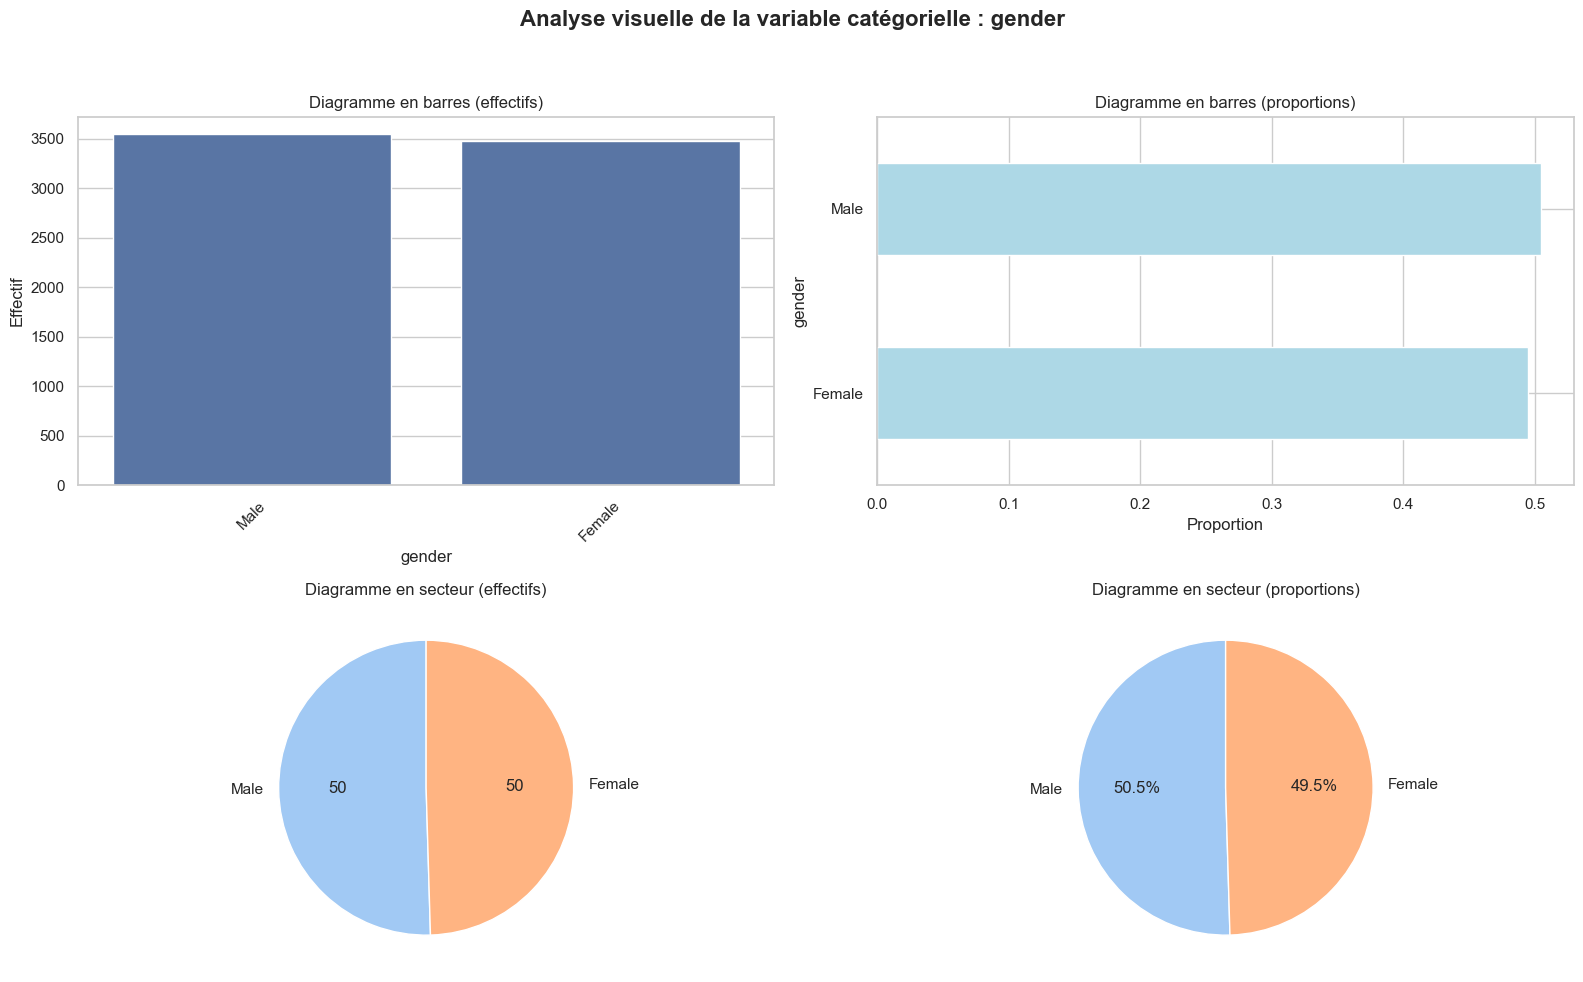

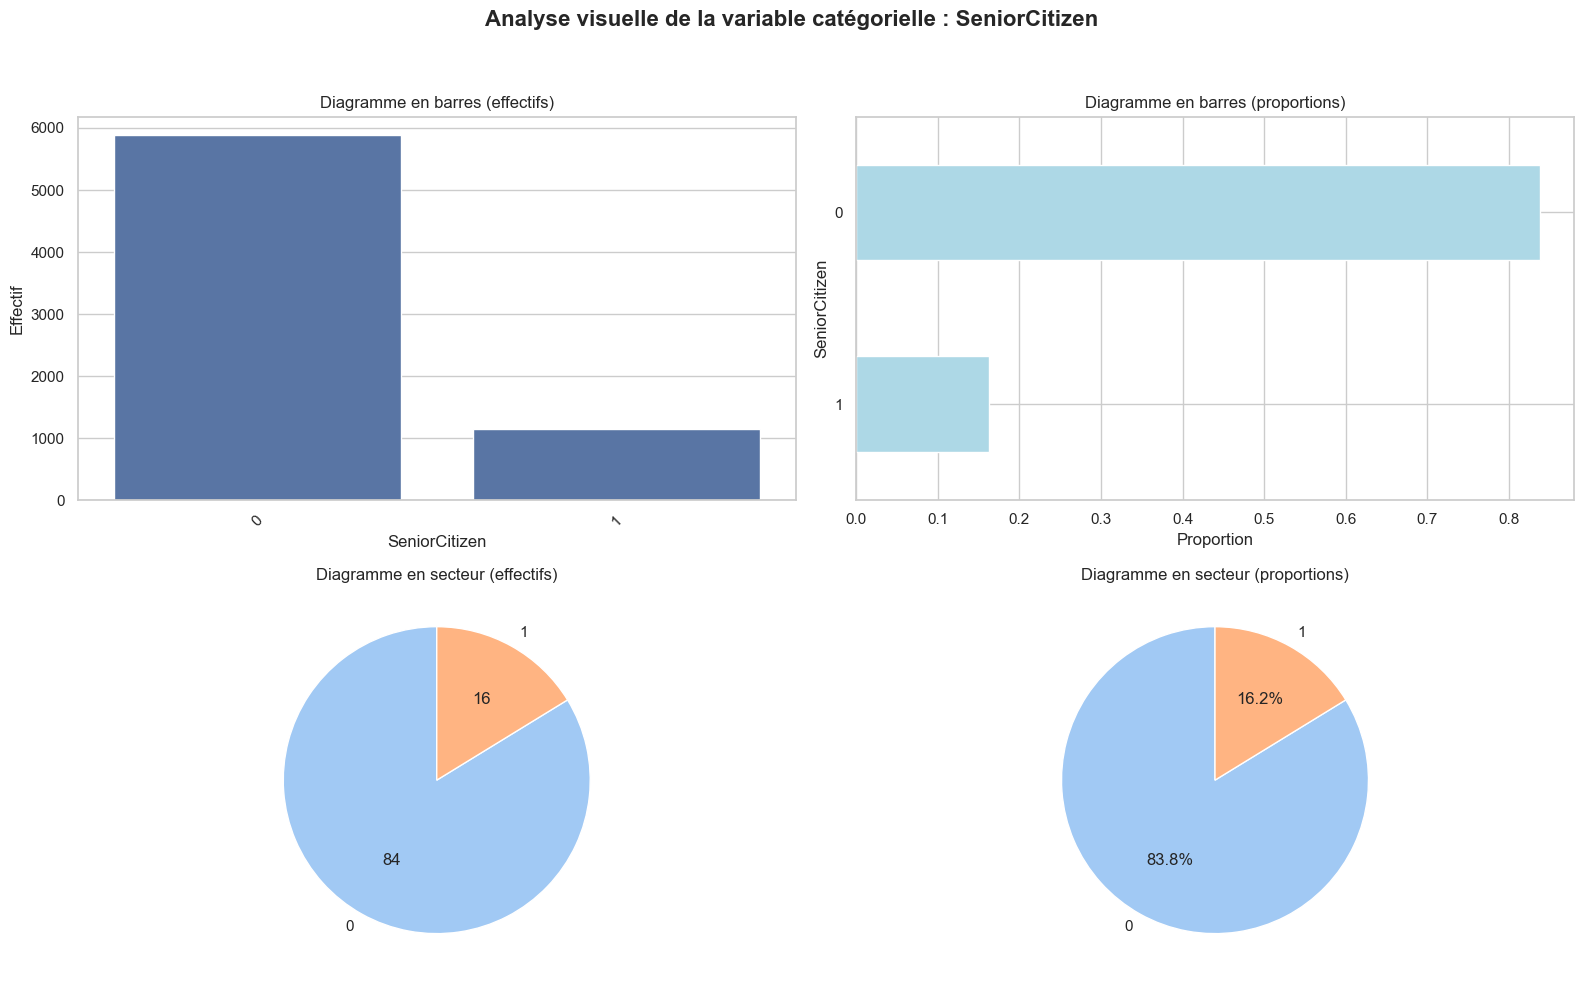

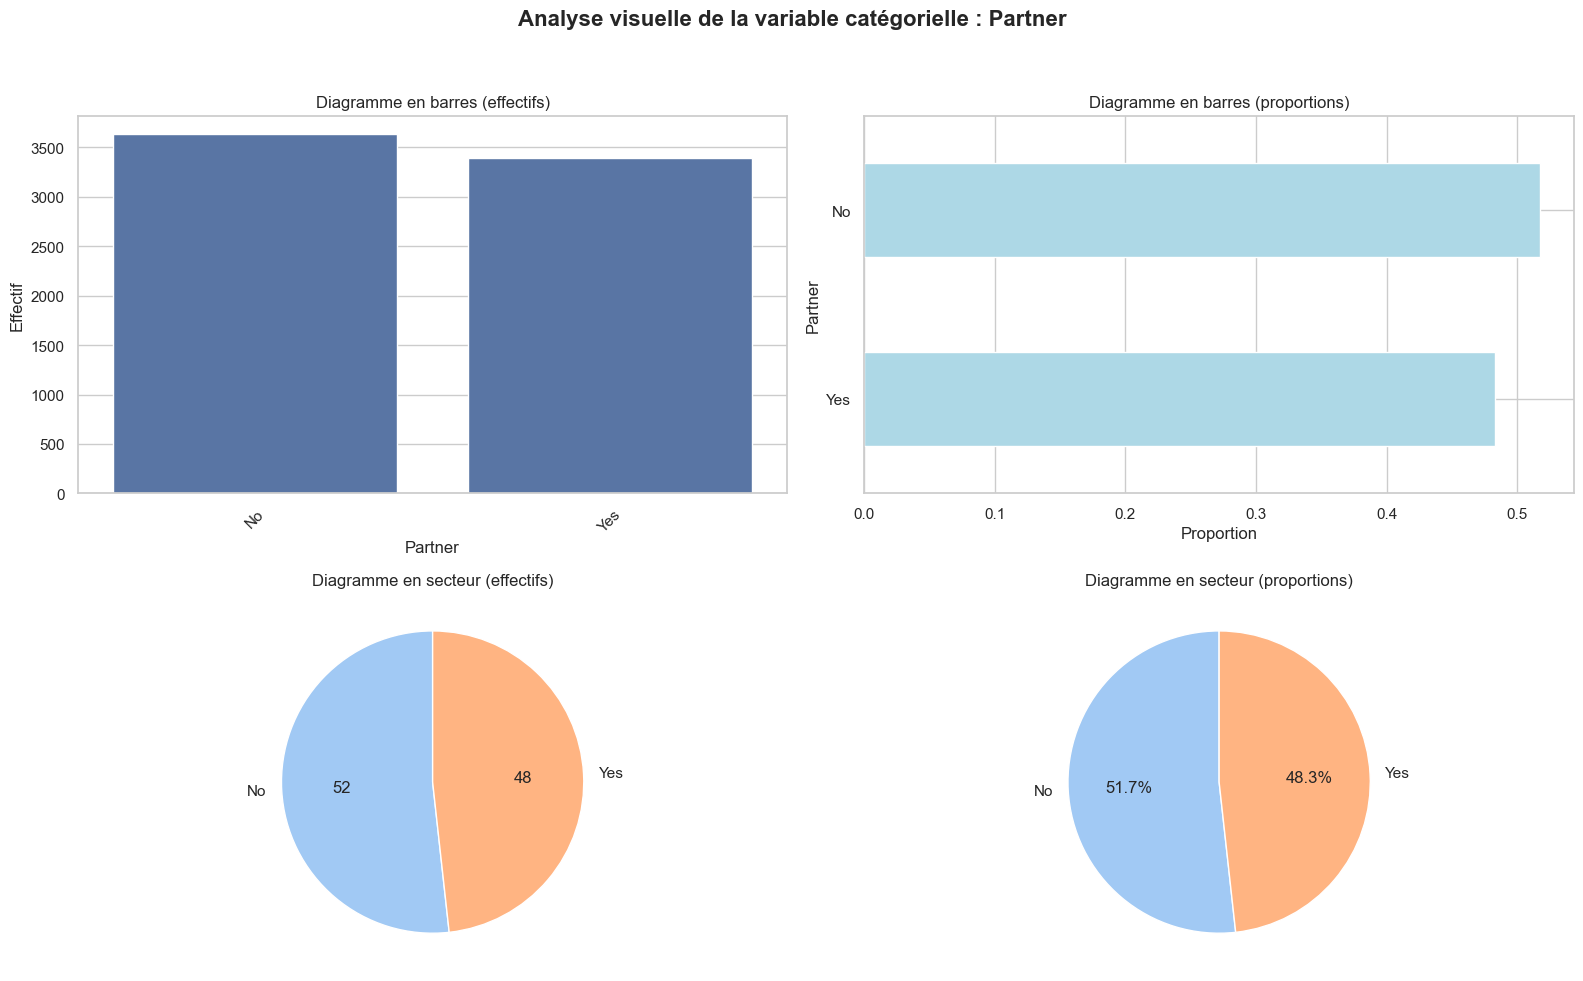

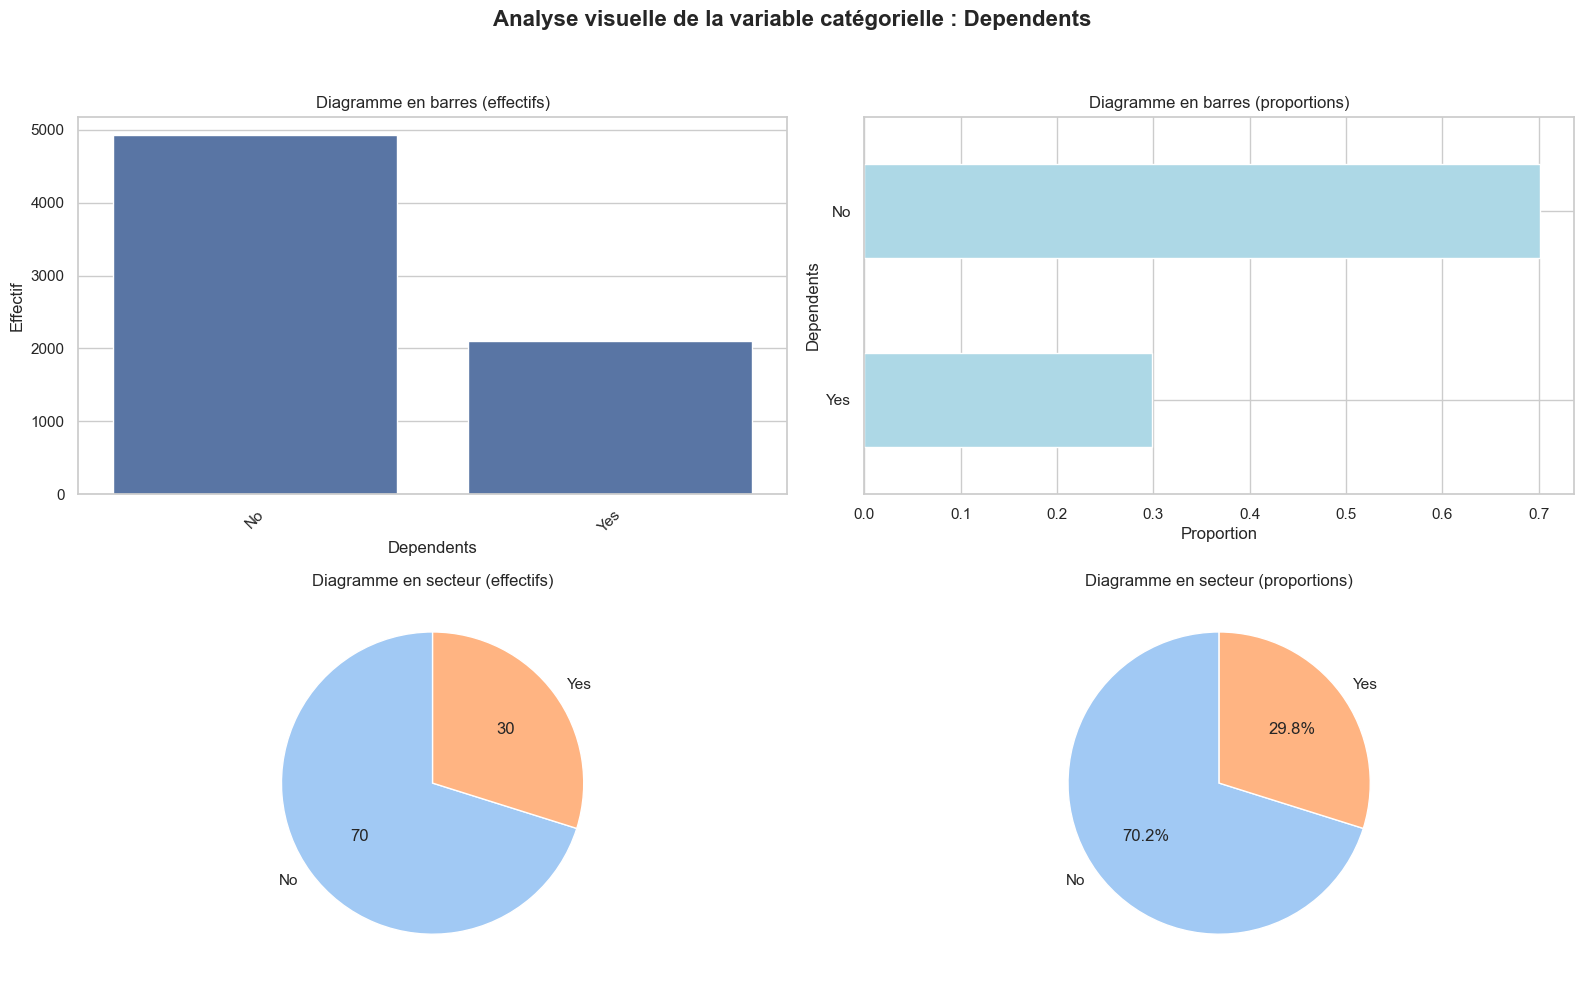

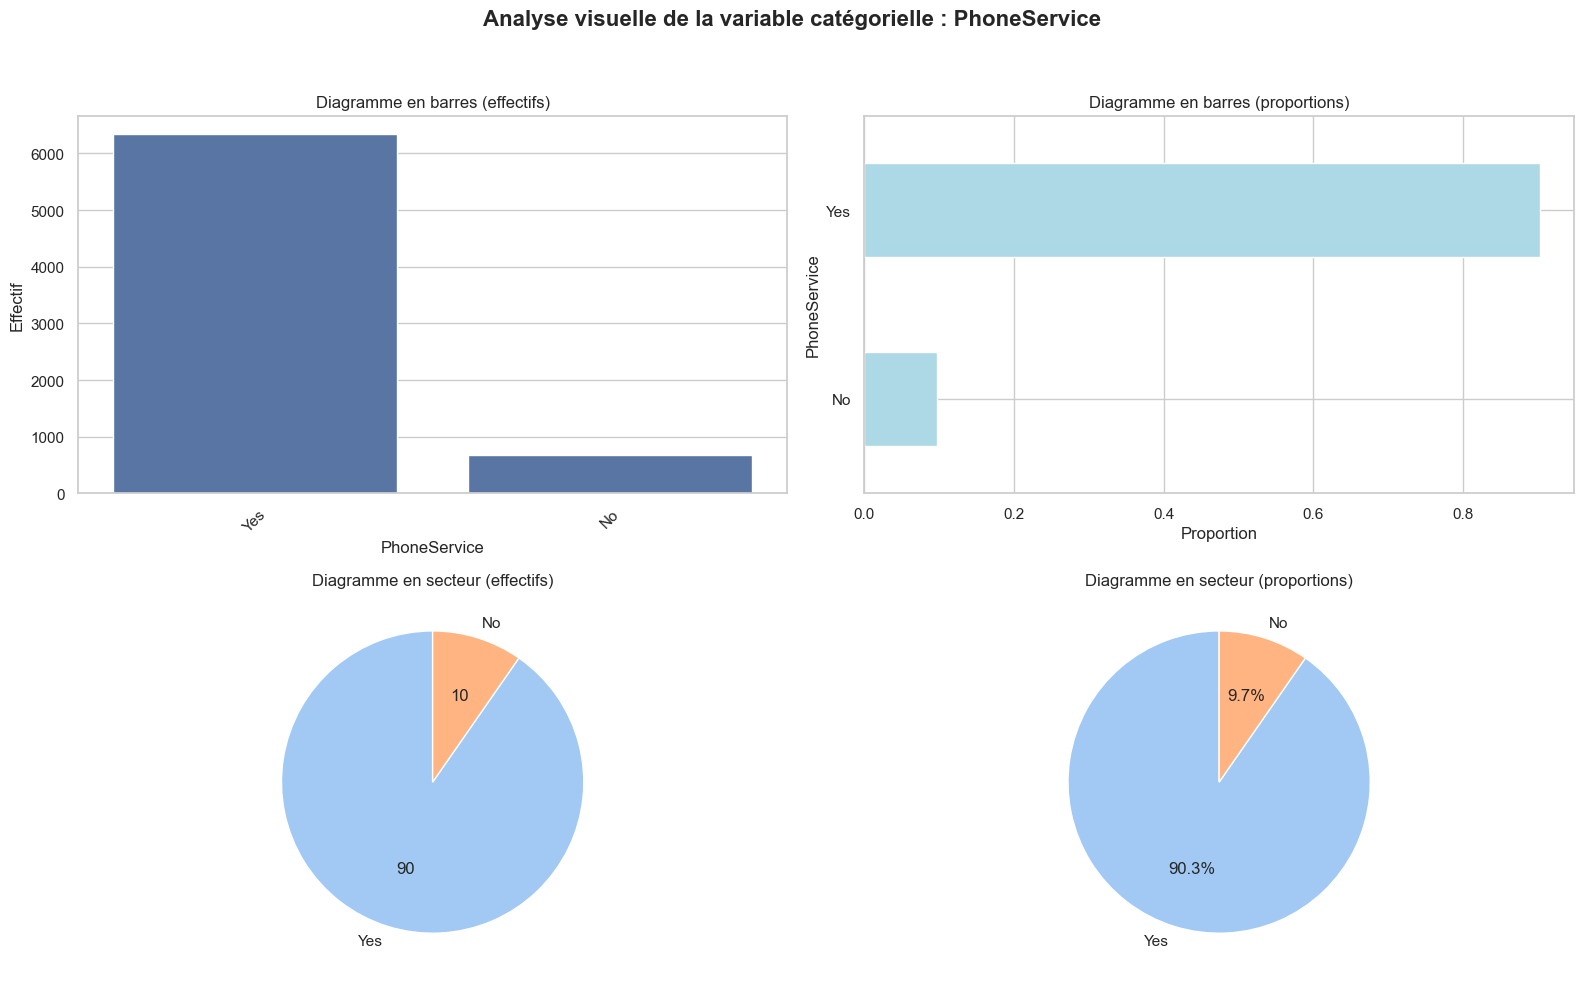

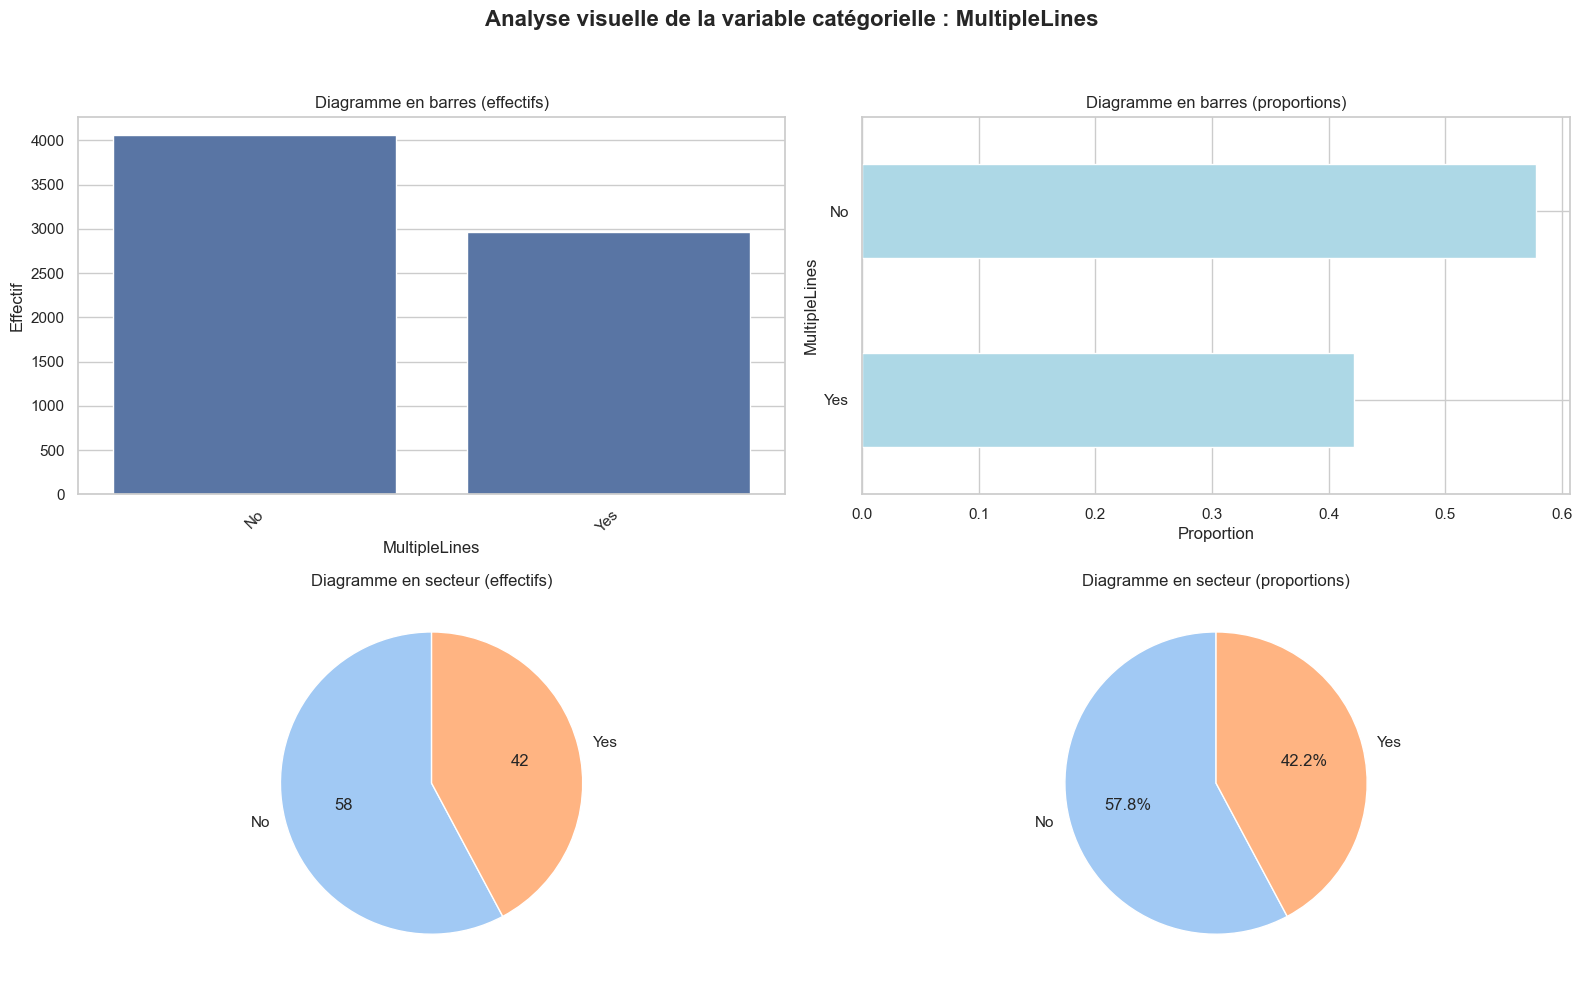

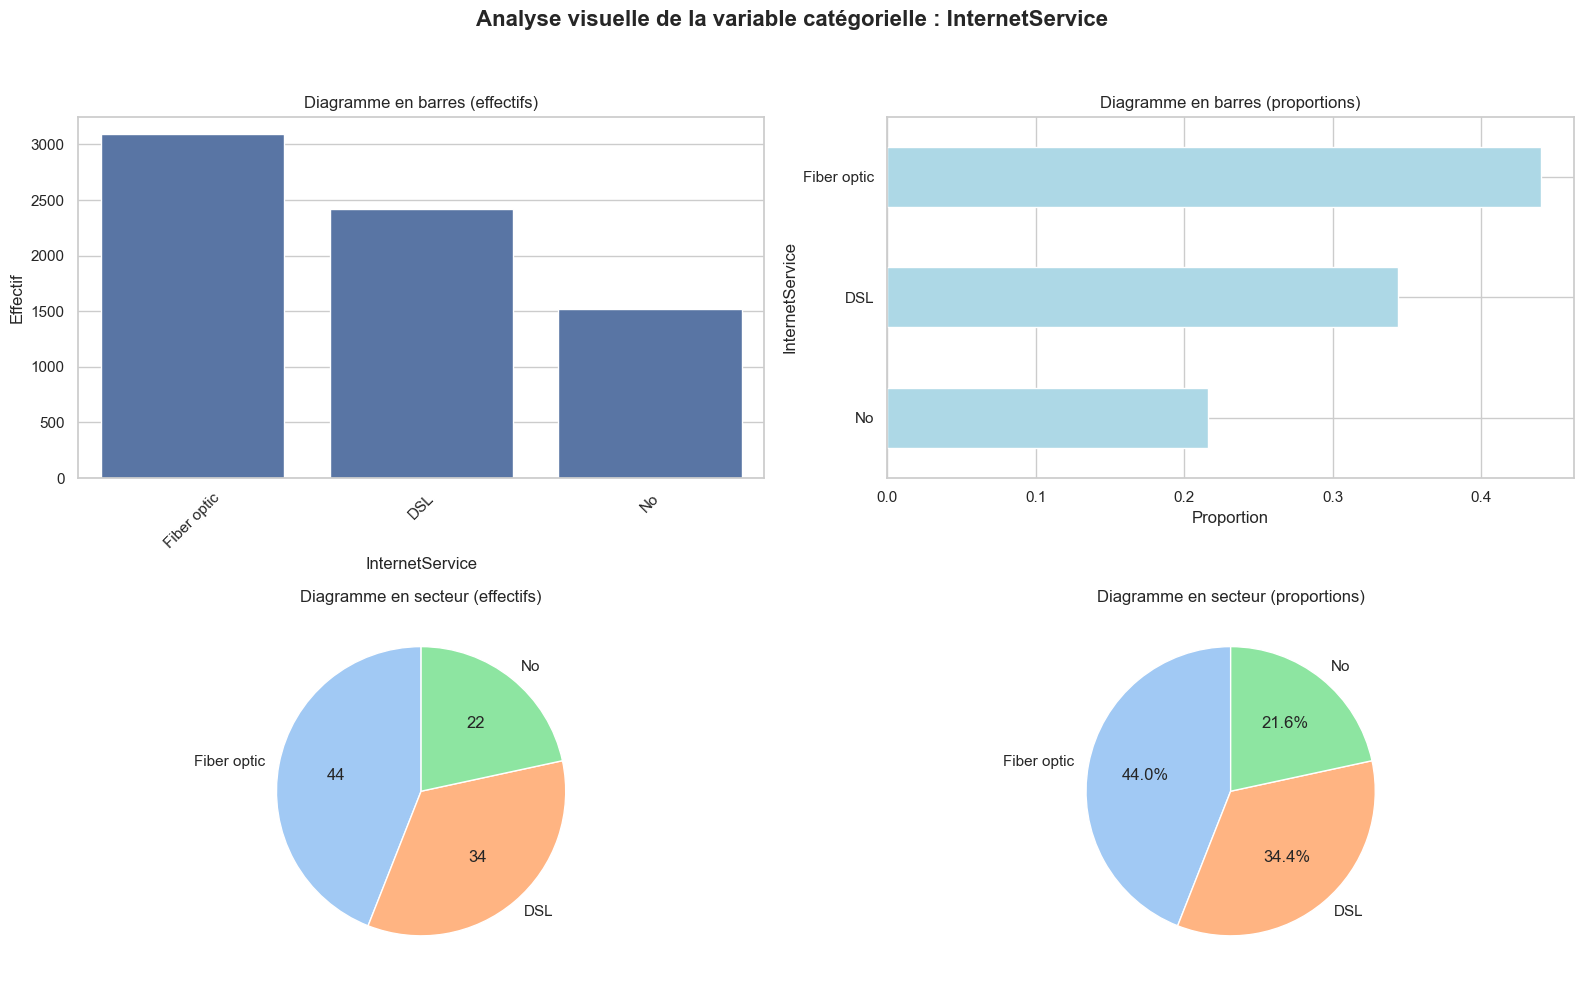

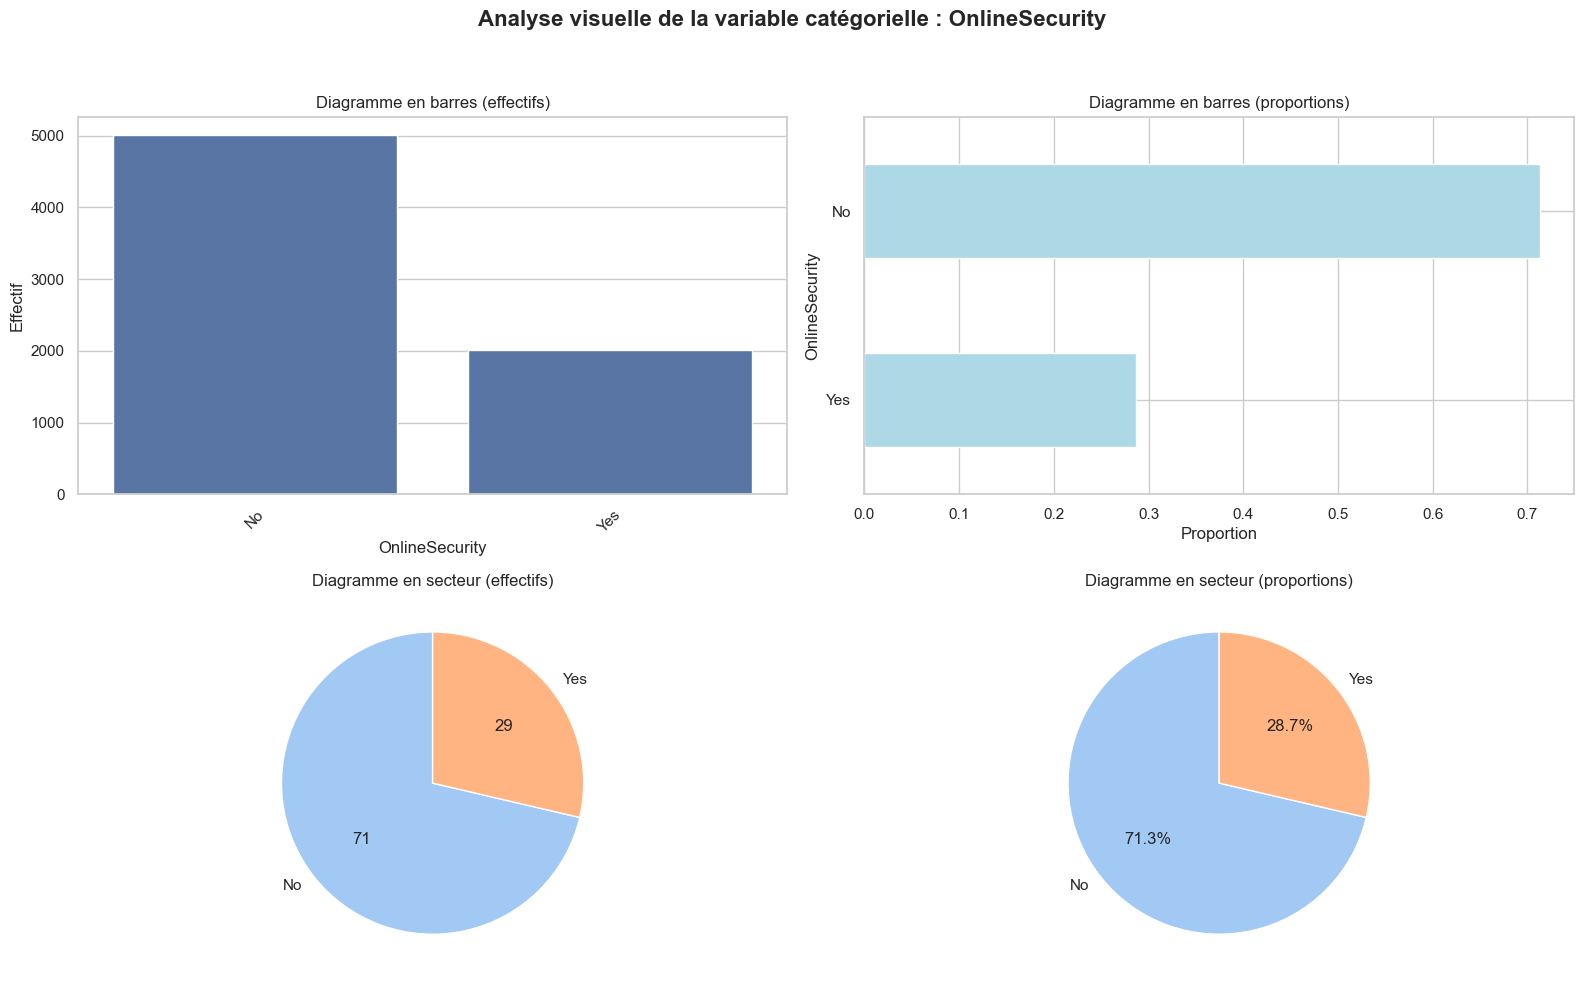

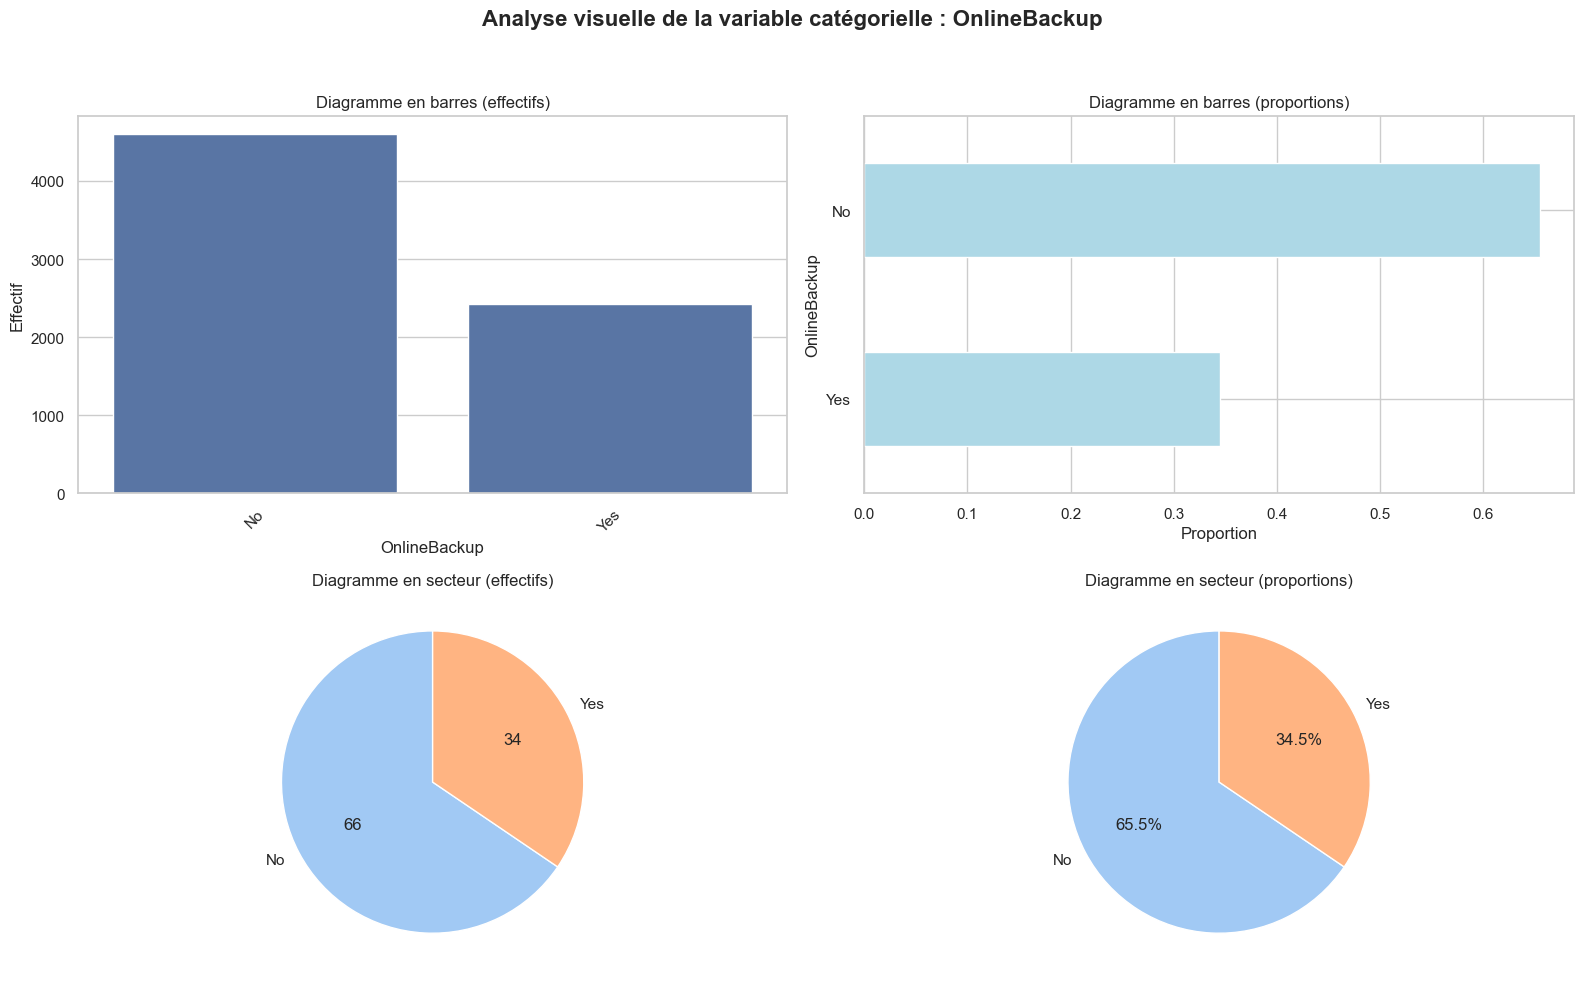

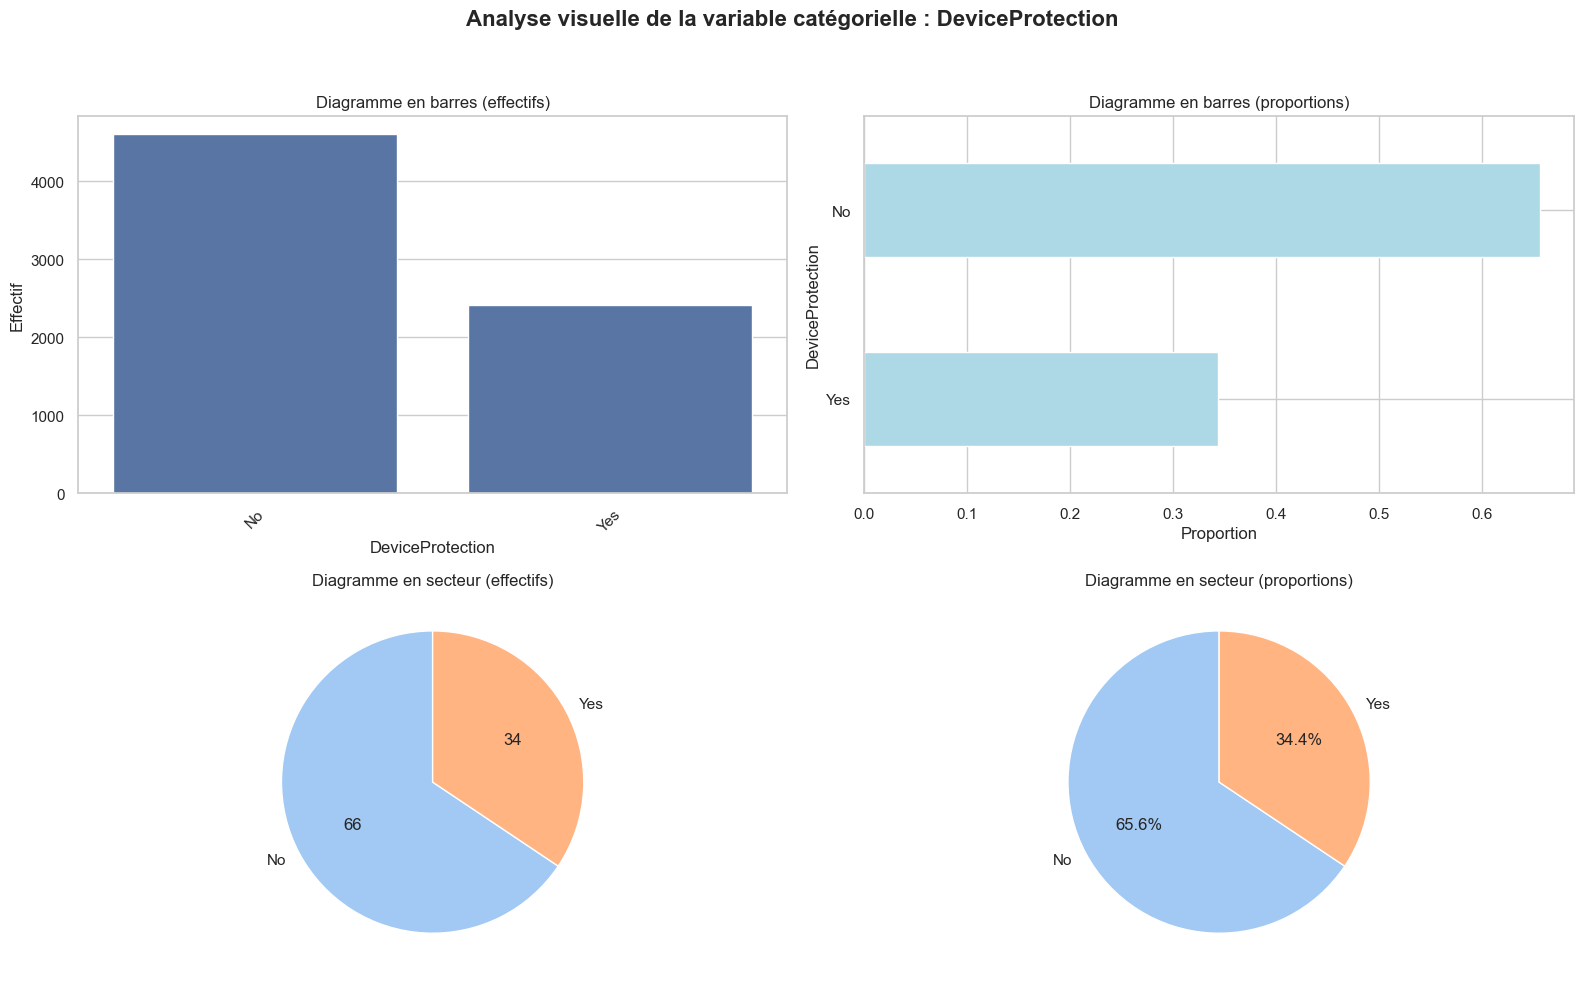

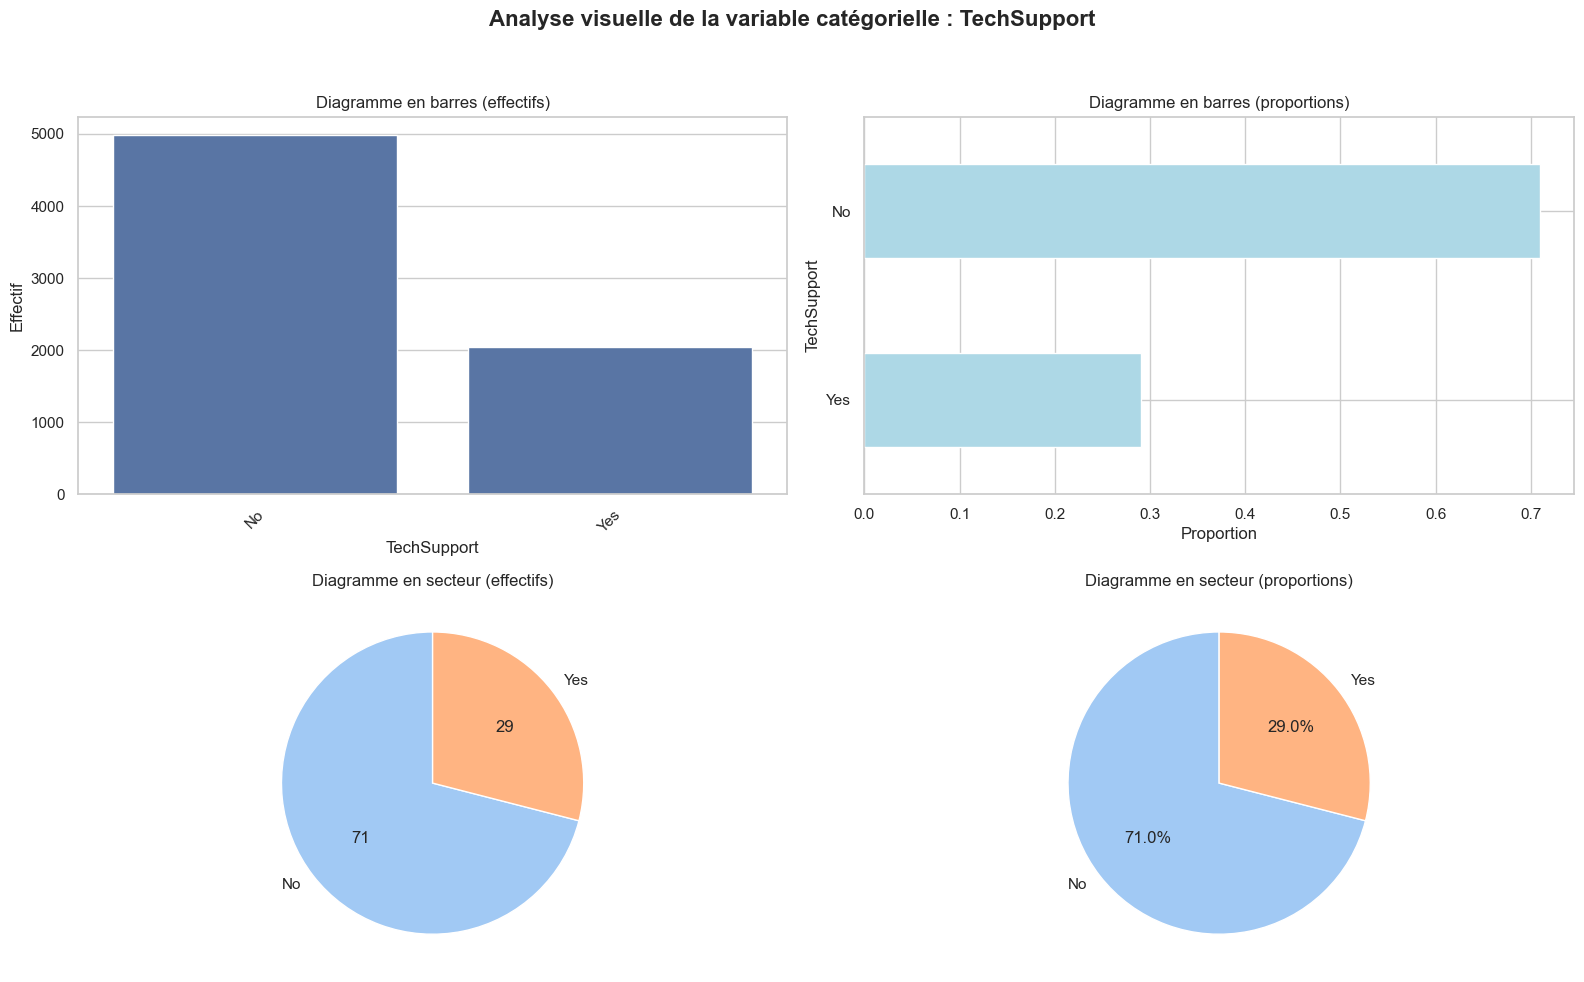

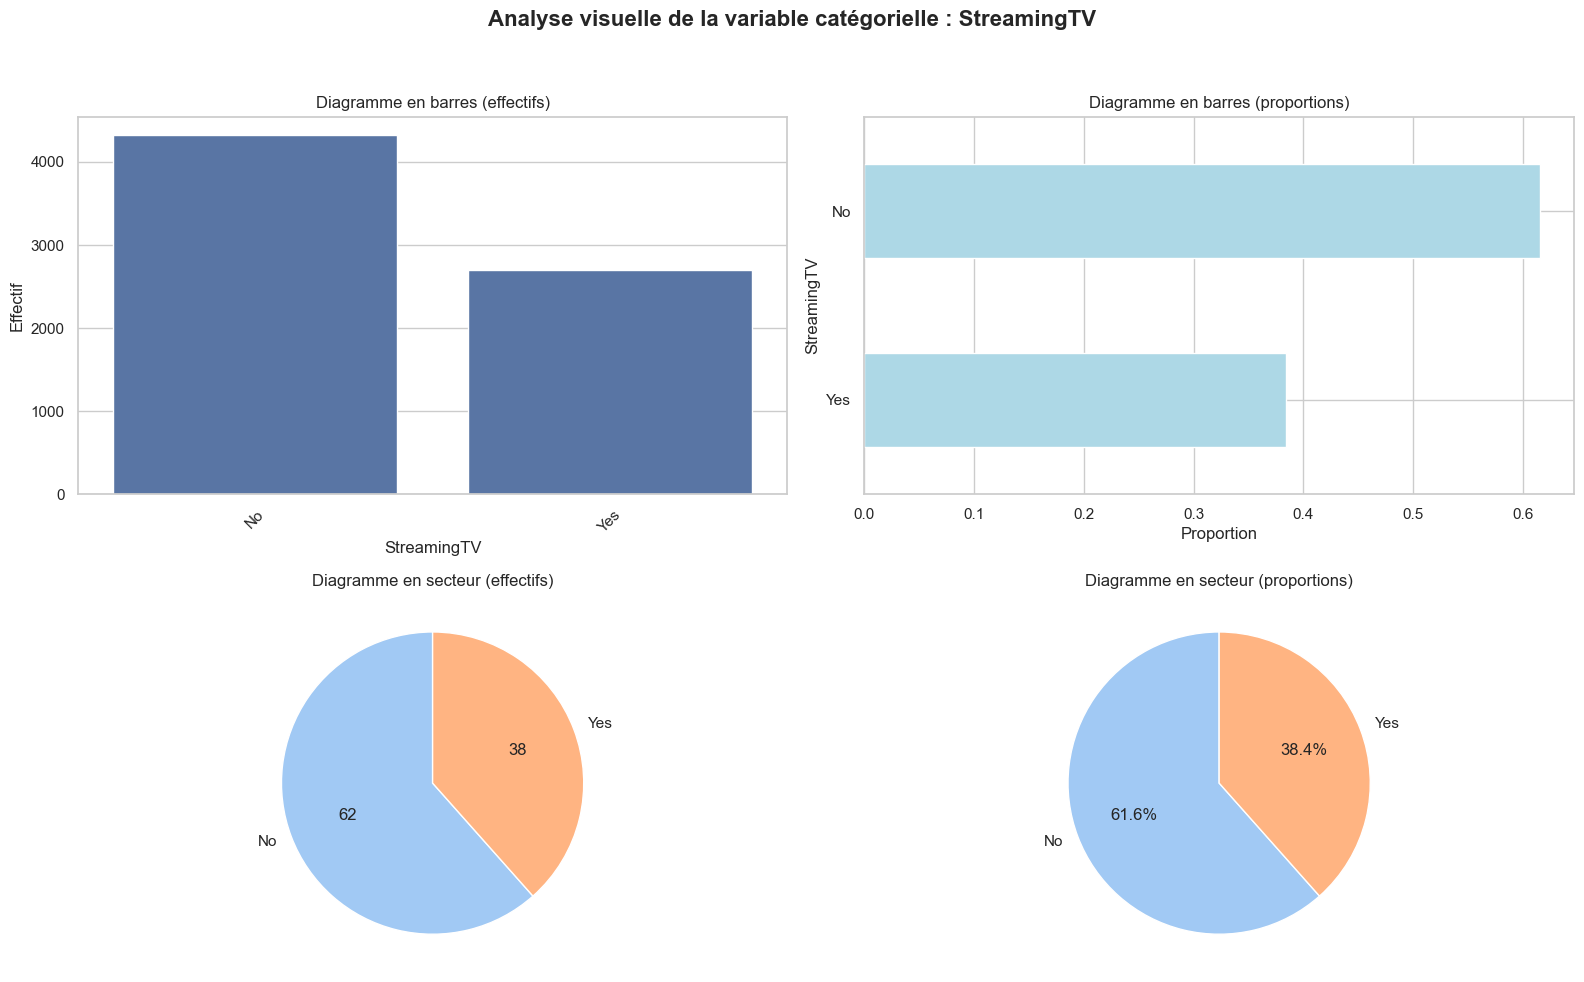

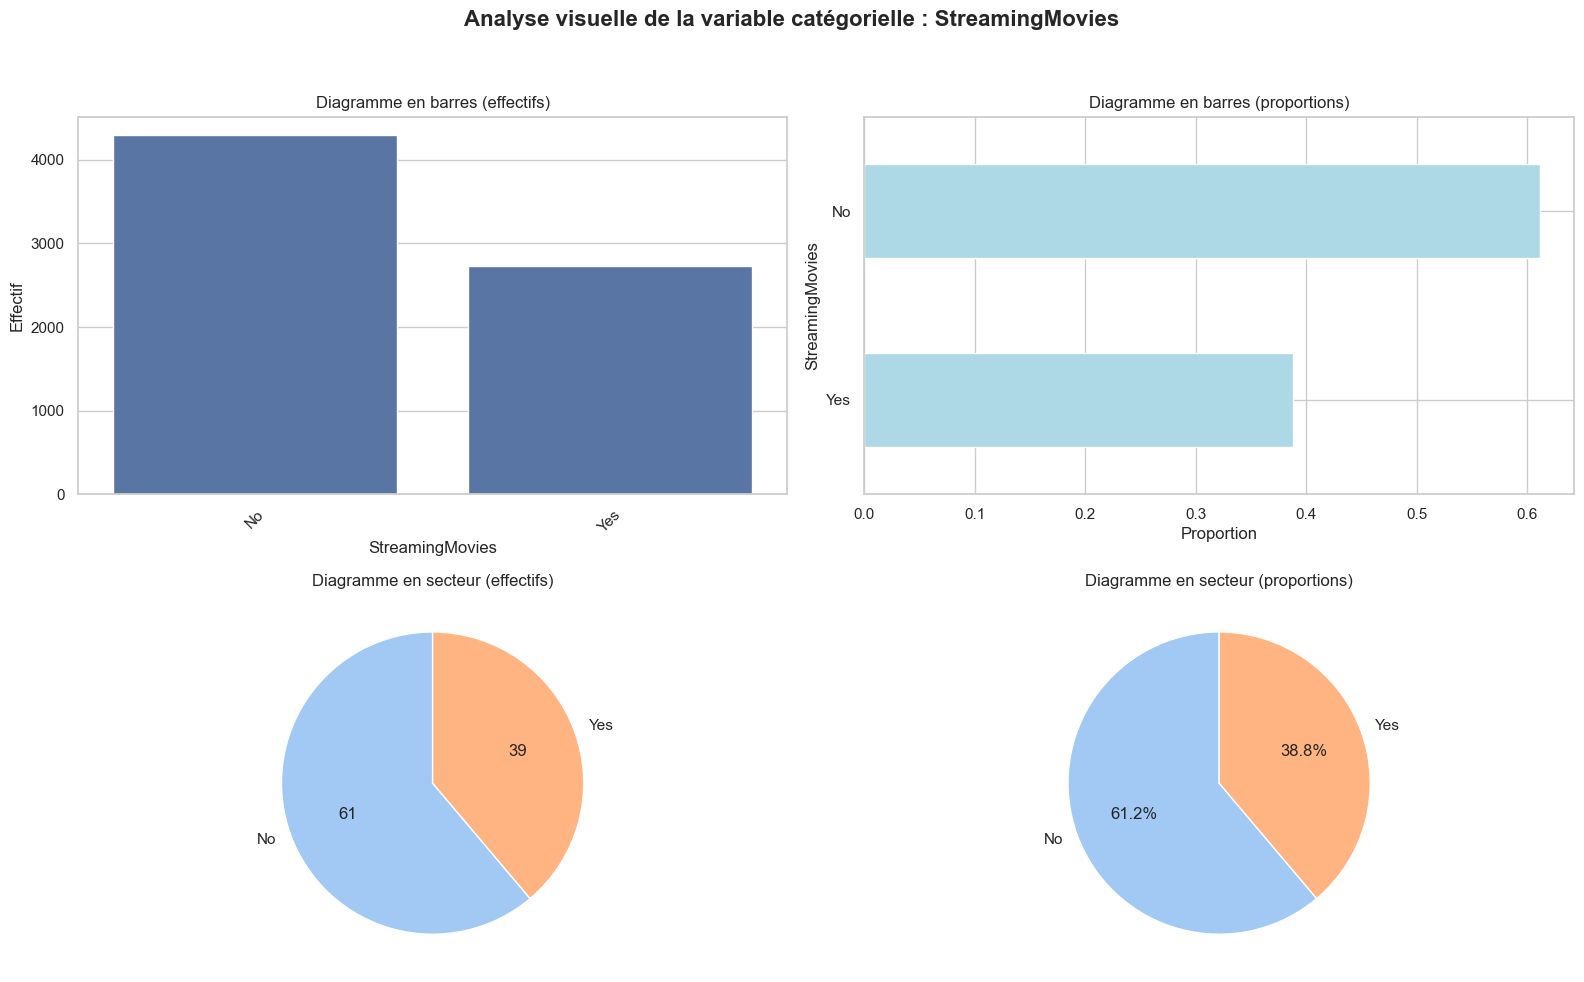

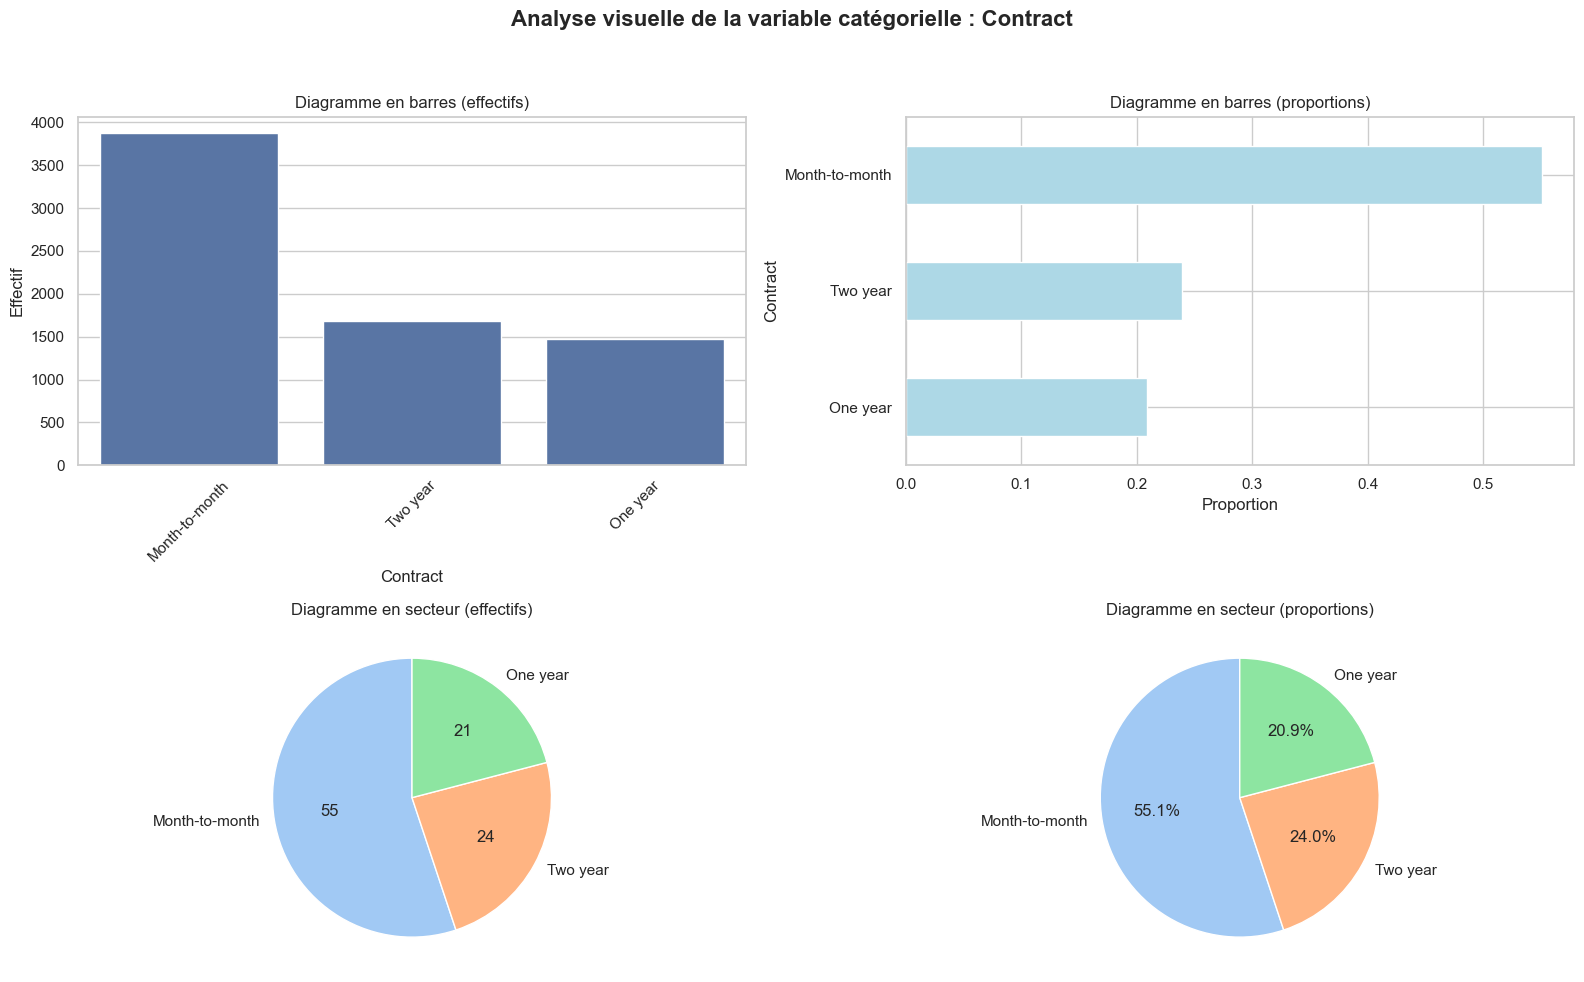

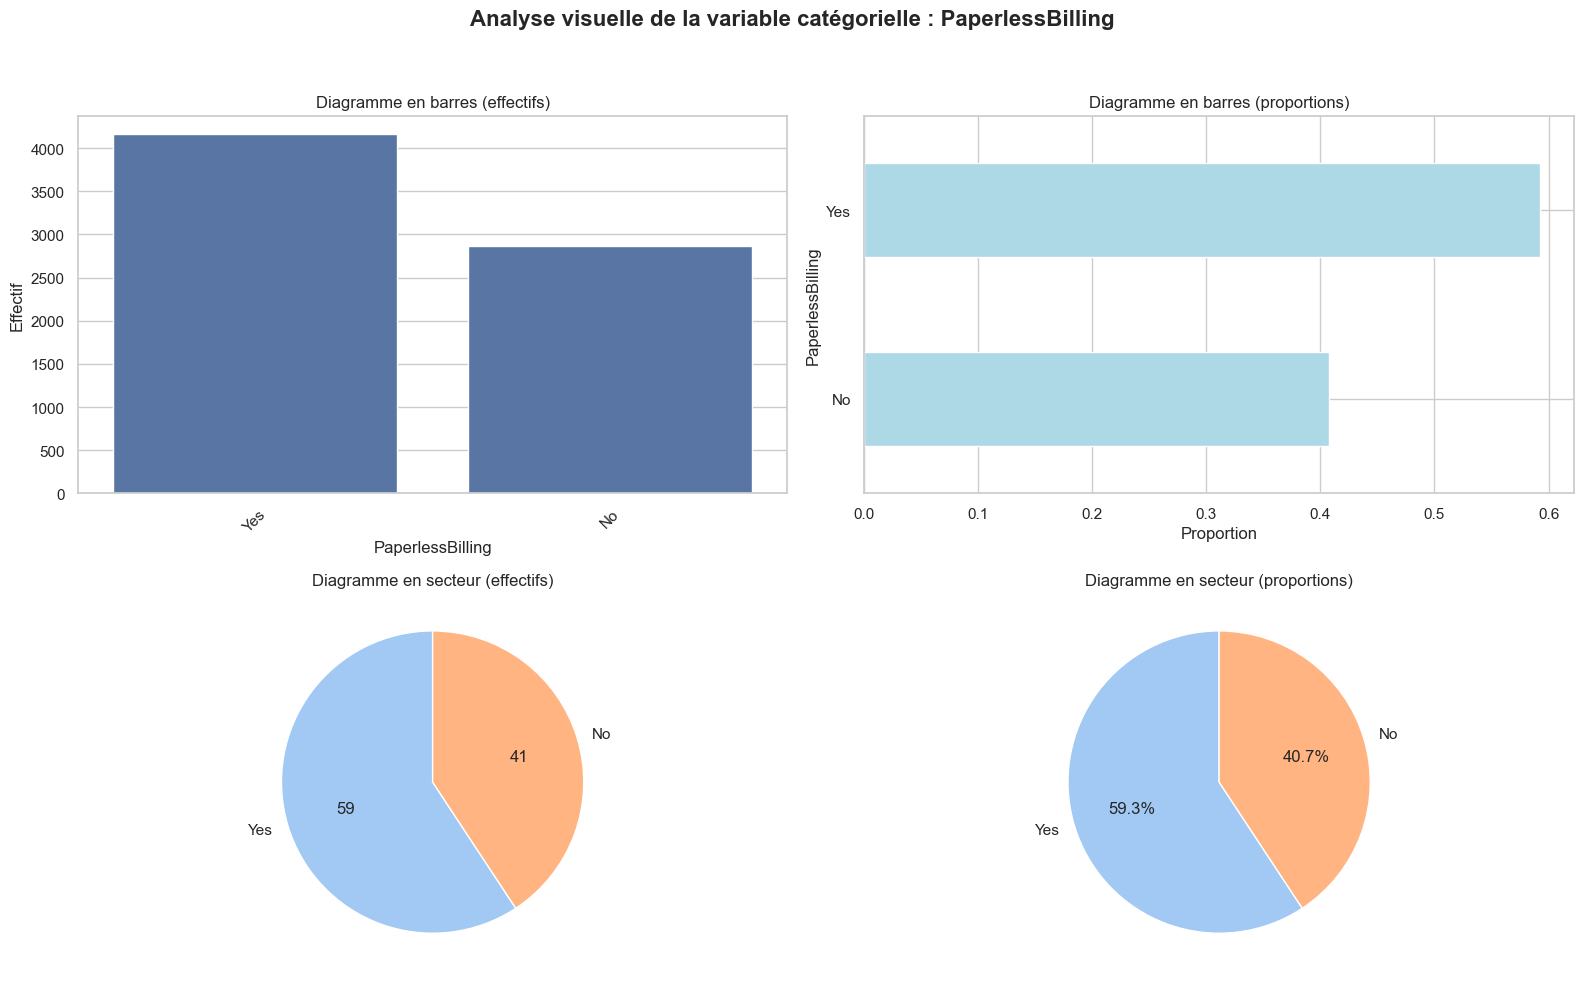

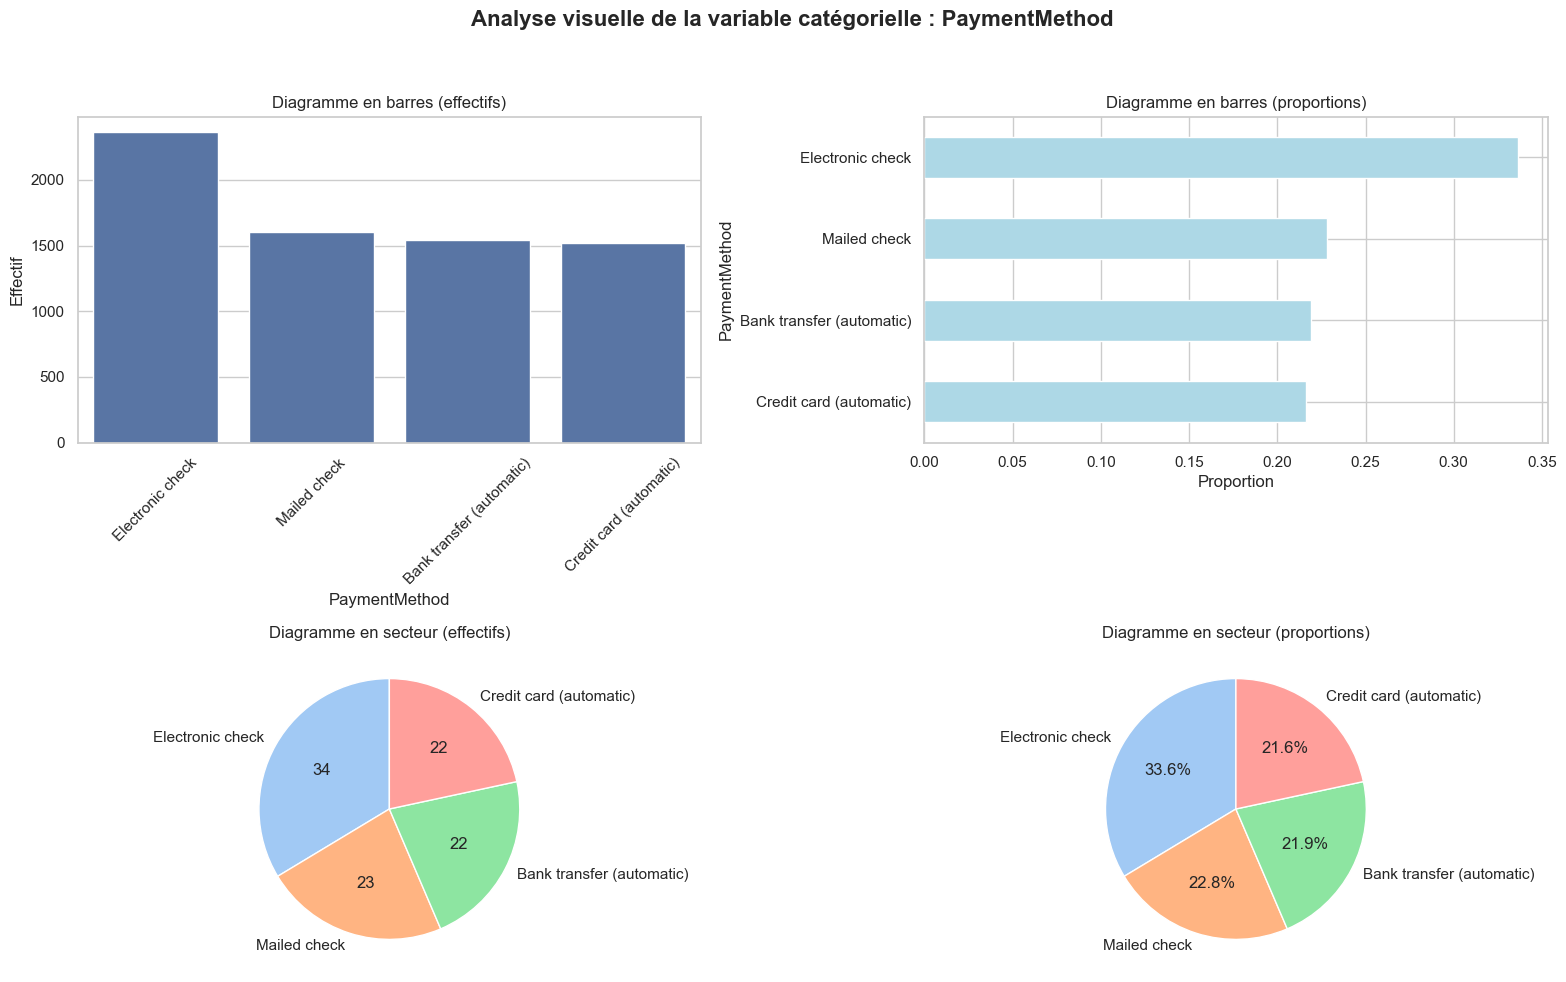

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🔧 Fonction de visualisation personnalisée pour variables qualitatives
def plot_categorical_distribution(df, col):
    data = df[col].dropna()
    freq_table = data.value_counts()
    prop_table = data.value_counts(normalize=True)

    fig, axs = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle(f"Analyse visuelle de la variable catégorielle : {col}", fontsize=16, fontweight='bold')

    # 📊 Barres verticales (effectifs)
    sns.countplot(x=col, data=df, ax=axs[0, 0], order=freq_table.index)
    axs[0, 0].set_title("Diagramme en barres (effectifs)")
    axs[0, 0].set_ylabel("Effectif")
    axs[0, 0].set_xlabel(col)
    axs[0, 0].tick_params(axis='x', rotation=45)

    # 📊 Barres horizontales (proportions)
    prop_table.sort_values().plot.barh(ax=axs[0, 1], color='lightblue')
    axs[0, 1].set_title("Diagramme en barres (proportions)")
    axs[0, 1].set_xlabel("Proportion")
    axs[0, 1].set_ylabel(col)

    # 📈 Camembert (valeurs absolues)
    axs[1, 0].pie(freq_table, labels=freq_table.index, autopct='%1.0f', startangle=90, colors=sns.color_palette("pastel"))
    axs[1, 0].set_title("Diagramme en secteur (effectifs)")

    # 📈 Camembert (valeurs relatives)
    axs[1, 1].pie(prop_table, labels=prop_table.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    axs[1, 1].set_title("Diagramme en secteur (proportions)")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# 🧾 Liste des variables qualitatives à visualiser
variables_qualitatives = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# 🔁 Application de la fonction à chaque variable catégorielle
for var in variables_qualitatives:
    plot_categorical_distribution(df, var)


## 🔍 2.2 Analyse bivariée

## 📈 2.2.1 Analyse bivariée entre les variables **quantitatives** et la variable cible `Churn`

Dans cette section, nous étudions comment les **variables numériques** influencent la probabilité qu’un client quitte l’entreprise (`Churn`). Les variables quantitatives considérées sont par exemple :

- `tenure` : ancienneté du client (en mois),
- `MonthlyCharges` : montant payé mensuellement,
- `TotalCharges` : montant total payé depuis l’abonnement.

---

### 🔍 Objectifs de cette analyse

- Identifier des **différences de distribution** des variables quantitatives entre les clients ayant churné (`Churn = Yes`) et ceux restés (`Churn = No`).
- Détecter des **tendances comportementales** : par exemple, les clients avec une faible ancienneté ou des frais élevés quittent-ils plus souvent ?
- Appuyer ces observations par des **tests statistiques rigoureux**.

---

### 📊 Visualisations utilisées

Afin de comparer la distribution des variables quantitatives entre les groupes de churn, nous utilisons plusieurs types de graphiques :

- **Boxplots (boîtes à moustaches)** :
  - Visualisent la **médiane**, les **quartiles** et les **valeurs aberrantes**.
  - Exemple : une médiane plus basse de `tenure` chez les churners suggère un lien entre faible ancienneté et départ.

- **Violin plots** *(optionnel)* :
  - Combinent la forme du boxplot avec une **courbe de densité**.
  - Apportent une vision plus fine de la **distribution**.

- **KDE plots (courbes de densité)** :
  - Représentent les **densités de probabilité estimées** pour chaque groupe.
  - Permettent d’identifier les zones où les churners se concentrent.

- **Histogrammes groupés ou empilés** *(optionnel)* :
  - Offrent une représentation simple et intuitive des fréquences selon la valeur de churn.

---

### 🧪 Tests statistiques : ANOVA et alternatives

Pour chaque variable quantitative, nous testons si les moyennes sont **statistiquement différentes** entre les groupes :

- **Test ANOVA (analyse de variance à un facteur)** :
  - **H₀** : les moyennes sont identiques pour `Churn = Yes` et `No`.
  - **H₁** : au moins une moyenne diffère.
  - Si **p-value < 0.05**, on conclut à une différence significative.

> Remarque : si les distributions sont **asymétriques ou hétéroscédastiques**, des tests **non paramétriques** comme **Mann–Whitney U** peuvent être plus appropriés.

---

### ✅ Interprétation attendue

- Une variable dont la **moyenne diffère significativement** entre churners et non-churners indique une **forte valeur explicative**.
- Par exemple :
  - Une **ancienneté (`tenure`) plus faible** chez les churners suggère un départ précoce.
  - Des **frais mensuels (`MonthlyCharges`) plus élevés** pourraient être un facteur de désengagement.
  - Le **montant total (`TotalCharges`) plus bas** chez les churners s’explique logiquement par une durée d’abonnement plus courte.

---

### 🛠️ Pistes pour la modélisation

Les résultats de cette analyse permettent de :

- **Sélectionner les variables** les plus discriminantes.
- **Créer des features dérivées** (e.g. ratio charges/tenure, seuils).
- **Effectuer des transformations** (standardisation, log-transform).
- **Identifier des groupes à risque** à cibler dans la stratégie client.

> Cette étape est essentielle pour **comprendre les déterminants numériques du churn** et guider les **étapes de modélisation supervisée** à venir.


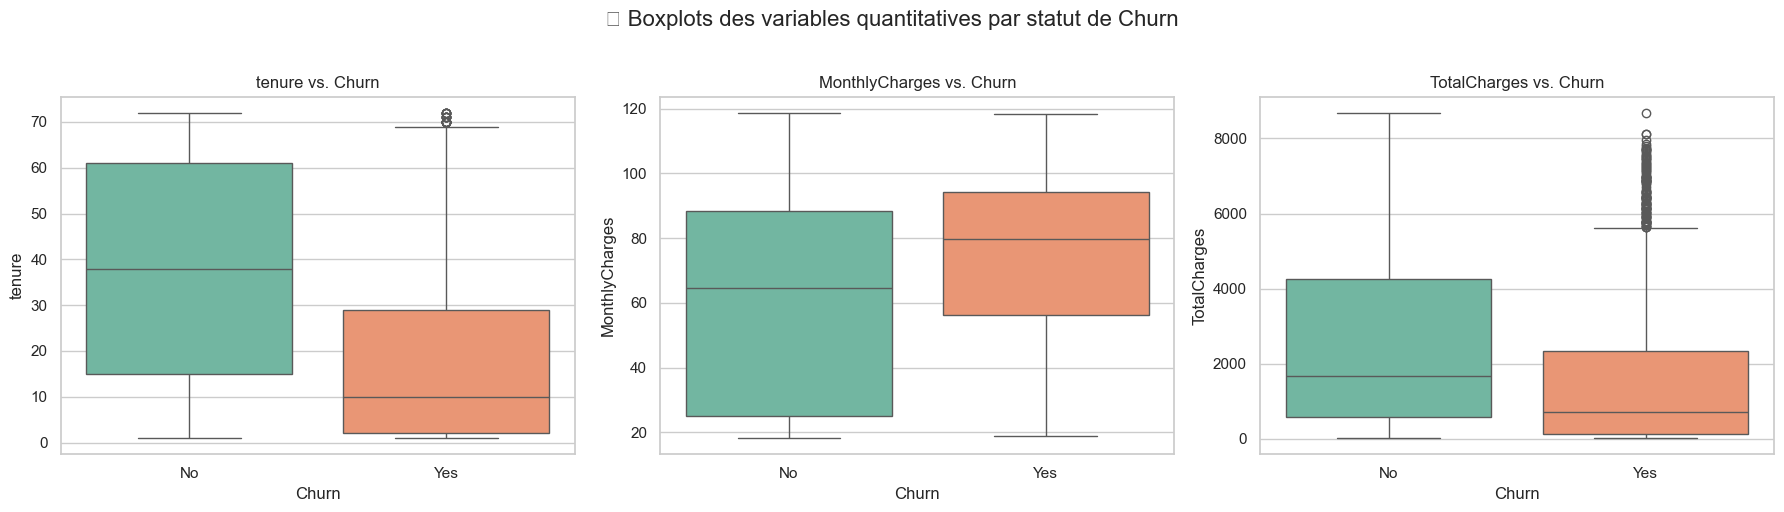

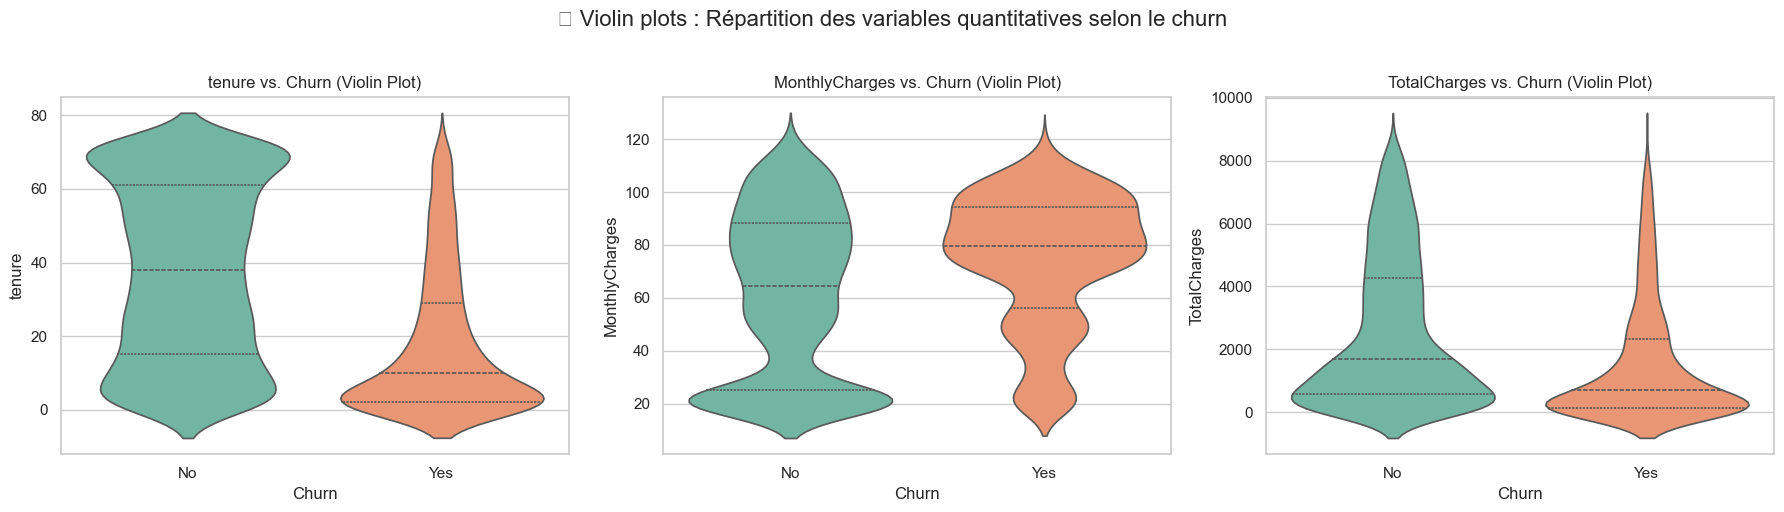

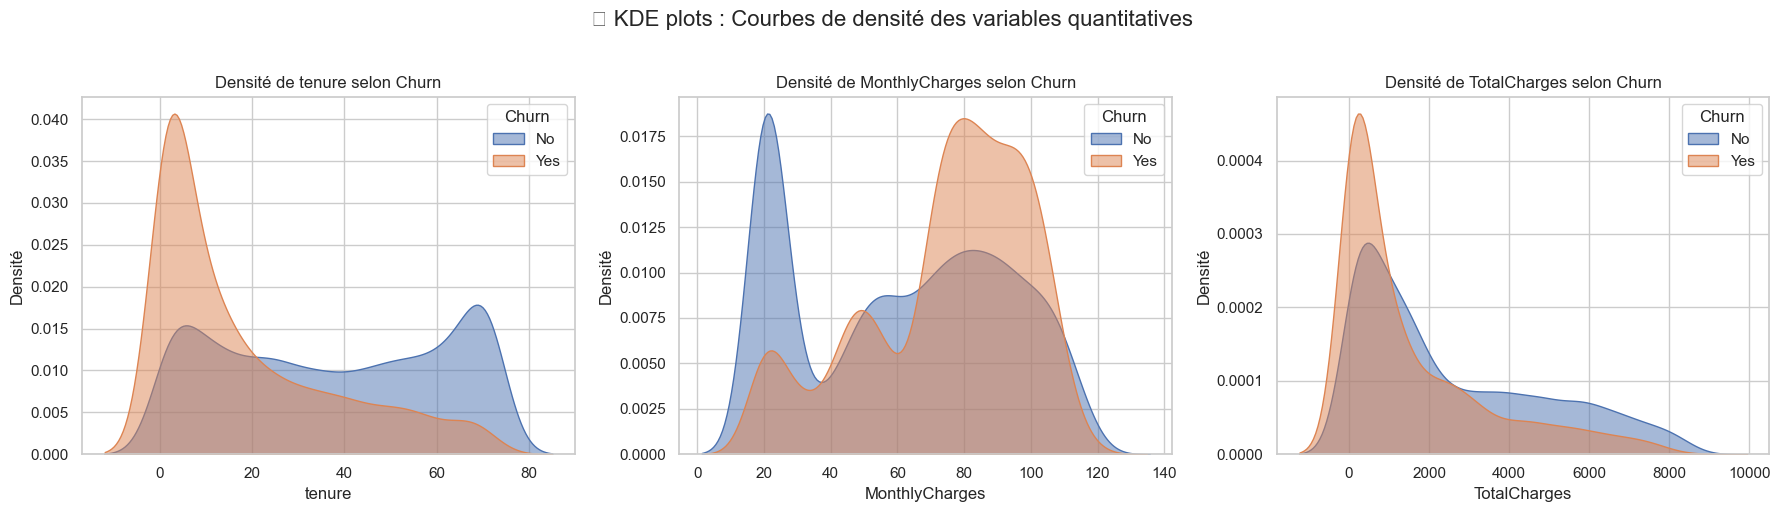

🧪 Résultats des tests ANOVA et Mann–Whitney U :



,Variable,F-statistic (ANOVA),p-value (ANOVA),U-statistic (Mann–Whitney),p-value (Mann–Whitney)
0,tenure,1007.509,0.0,2494979,0.0
1,MonthlyCharges,271.577,0.0,5986148,0.0
2,TotalCharges,291.345,0.0,3360665,0.0


In [86]:
# 📥 Import des bibliothèques nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, mannwhitneyu
import warnings
warnings.filterwarnings("ignore")

# 📌 Variables quantitatives à analyser
quant_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']
target = 'Churn'

# 📊 1. BOXPLOTS
plt.figure(figsize=(18, 5))
for i, var in enumerate(quant_vars, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=target, y=var, data=df, palette="Set2")
    plt.title(f'{var} vs. Churn')
    plt.xlabel('Churn')
    plt.ylabel(var)
plt.suptitle('📦 Boxplots des variables quantitatives par statut de Churn', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# 🎻 2. VIOLIN PLOTS
plt.figure(figsize=(18, 5))
for i, var in enumerate(quant_vars, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(x=target, y=var, data=df, palette="Set2", inner="quartile")
    plt.title(f'{var} vs. Churn (Violin Plot)')
    plt.xlabel('Churn')
    plt.ylabel(var)
plt.suptitle('🎻 Violin plots : Répartition des variables quantitatives selon le churn', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# 📈 3. KDE PLOTS
plt.figure(figsize=(18, 5))
for i, var in enumerate(quant_vars, 1):
    plt.subplot(1, 3, i)
    sns.kdeplot(data=df[df[target] == 'No'], x=var, fill=True, label='No', alpha=0.5)
    sns.kdeplot(data=df[df[target] == 'Yes'], x=var, fill=True, label='Yes', alpha=0.5)
    plt.title(f'Densité de {var} selon Churn')
    plt.xlabel(var)
    plt.ylabel('Densité')
    plt.legend(title='Churn')
plt.suptitle('📈 KDE plots : Courbes de densité des variables quantitatives', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# 🧪 4. TESTS ANOVA + Mann–Whitney U
results = []
for var in quant_vars:
    groupe_yes = df[df[target] == 'Yes'][var].dropna()
    groupe_no = df[df[target] == 'No'][var].dropna()

    # Test ANOVA (moyennes)
    f_stat, p_anova = f_oneway(groupe_yes, groupe_no)

    # Test Mann–Whitney U (non paramétrique)
    u_stat, p_mannwhitney = mannwhitneyu(groupe_yes, groupe_no, alternative='two-sided')

    results.append({
        'Variable': var,
        'F-statistic (ANOVA)': round(f_stat, 3),
        'p-value (ANOVA)': round(p_anova, 5),
        'U-statistic (Mann–Whitney)': int(u_stat),
        'p-value (Mann–Whitney)': round(p_mannwhitney, 5)
    })

# 📋 Résultats combinés
results_df = pd.DataFrame(results).sort_values(by='p-value (ANOVA)')
print("🧪 Résultats des tests ANOVA et Mann–Whitney U :\n")
display(results_df)  # À utiliser uniquement en notebook (Jupyter / Colab / VS Code)


---

## 🧪 Résultats des tests statistiques : variables quantitatives vs. `Churn`

| Variable         | F-statistic (ANOVA) | p-value (ANOVA) | U-statistic (Mann–Whitney) | p-value (Mann–Whitney) |
|------------------|---------------------|------------------|-----------------------------|--------------------------|
| `tenure`         | 1007.509            | 0.00000          | 2,494,979                   | 0.00000                  |
| `MonthlyCharges` | 271.577             | 0.00000          | 5,986,148                   | 0.00000                  |
| `TotalCharges`   | 291.345             | 0.00000          | 3,360,665                   | 0.00000                  |

---

### ✅ Interprétation des résultats

- Les **deux tests** statistiques appliqués :
  - **ANOVA** : pour comparer les **moyennes** entre les groupes `Churn = Yes` et `No`,
  - **Mann–Whitney U** : pour comparer les **distributions** sans hypothèse de normalité,
  montrent des **résultats significatifs (p < 0.05)** pour toutes les variables.

- ➤ Cela indique que les clients ayant churné **se distinguent clairement** de ceux qui sont restés, en termes de caractéristiques numériques.

---

### 🔍 Analyse variable par variable

- **`tenure`** :
  - Moyenne nettement plus faible pour les churners.
  - Distribution différente entre les groupes.
  - 🔎 Interprétation : les churners sont souvent des **clients récents**.

- **`MonthlyCharges`** :
  - Moyenne plus élevée chez les churners.
  - 🔎 Interprétation : les clients qui paient plus **mensuellement** ont un risque plus élevé de churn.

- **`TotalCharges`** :
  - Montant total plus faible chez les churners (souvent corrélé à la durée).
  - 🔎 Interprétation : les churners ont souvent une **relation client plus courte**.

---

### 🧠 Conclusion

> Les variables `tenure`, `MonthlyCharges` et `TotalCharges` présentent toutes une **relation statistiquement significative** avec la variable cible `Churn`.  
Elles seront **priorisées** comme **variables explicatives** dans la modélisation prédictive.

---


---

## 🧮 2.2.2 Analyse bivariée entre les variables **qualitatives** et la variable cible `Churn`

Dans cette section, nous examinons comment chaque **variable qualitative** est associée à la variable cible `Churn`. L’objectif est de repérer les **modalités** (ex. : types de contrat, services, méthodes de paiement, etc.) qui influencent significativement la probabilité de résiliation.

---

### 🔍 Objectifs de l’analyse

- Repérer les **modalités à risque élevé** de churn.
- Identifier les **variables explicatives discrètes** les plus pertinentes pour la prédiction.
- Vérifier si certaines modalités sont **surdimensionnées** parmi les churners (`Churn = Yes`).

---

### 🗂️ Exemples de variables qualitatives analysées

Les variables suivantes seront croisées avec la variable cible :

- `Contract` : type de contrat (Month-to-month, One year, Two year)
- `InternetService` : type de service Internet (DSL, Fiber optic, No)
- `PaymentMethod` : méthode de paiement (Electronic check, Mailed check, etc.)
- `SeniorCitizen`, `Partner`, `Dependents`, `OnlineSecurity`, `TechSupport`, etc.

---

### 📊 Visualisations utilisées

- **Barplots groupés** :
  - Permettent de comparer la **proportion de churn** pour chaque modalité.
  - Exemple : les clients avec un contrat mensuel ont-ils un taux de churn plus élevé que ceux avec un contrat de 2 ans ?

- **Barplots empilés (stacked)** :
  - Visualisent la répartition interne du churn **au sein de chaque modalité** (Yes vs No).

- **Heatmaps de fréquence croisée** *(optionnel)* :
  - Offrent une lecture matricielle des taux de churn pour des croisements entre deux variables qualitatives.

---

### 🧪 Tests statistiques : Khi² d’indépendance

Pour chaque variable qualitative, nous utilisons le **test du Khi²** pour évaluer si la répartition des modalités diffère significativement entre les groupes `Churn = Yes` et `Churn = No`.

- **Hypothèse nulle (H₀)** : la variable est **indépendante** de `Churn`.
- **Hypothèse alternative (H₁)** : la variable est **associée** au churn.
- Si **p-value < 0.05**, on rejette H₀ ⇒ la variable est **significativement liée** à la variable cible.

> Le test est basé sur une **table de contingence** (effectifs croisés) entre la variable et `Churn`.

---

### ✅ Interprétation attendue

- Une variable qualitative est intéressante si certaines **modalités ont un taux de churn anormalement élevé ou bas** comparé à la moyenne.
- Ces variables seront **sélectionnées pour l’encodage** lors de la phase de préparation des données en vue de la modélisation.

---

### 🔎 Exemple d’interprétation

Prenons la variable `Contract` :
- Les clients avec un contrat **"Month-to-month"** ont souvent un **taux de churn élevé** (>40%).
- Ceux avec un contrat **"Two year"** sont bien plus fidèles (churn <10%).

> Cette variable est donc un **fort prédicteur de fidélité**, et sera encodée en conséquence.

---

### 🔁 Impact pour la suite

> Les variables qualitatives jugées significatives seront **conservées** et transformées (via **One-Hot Encoding**, **Label Encoding**, etc.) pour la **modélisation supervisée**.

---


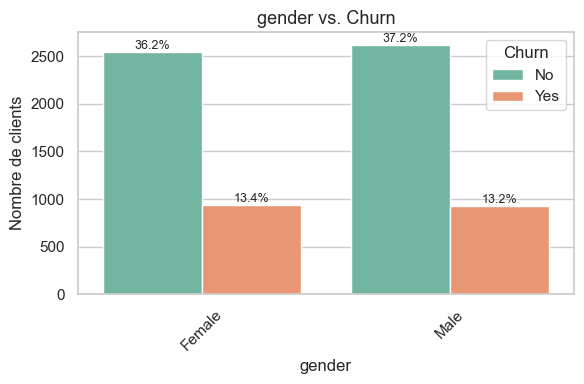

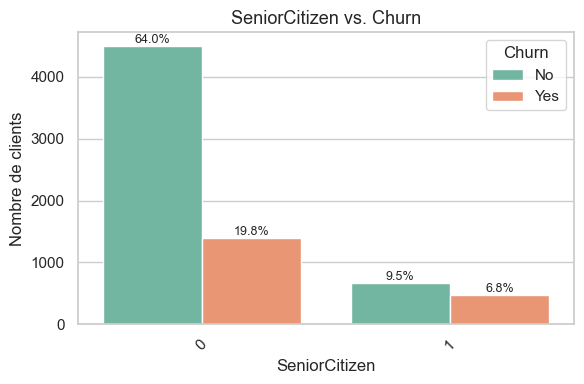

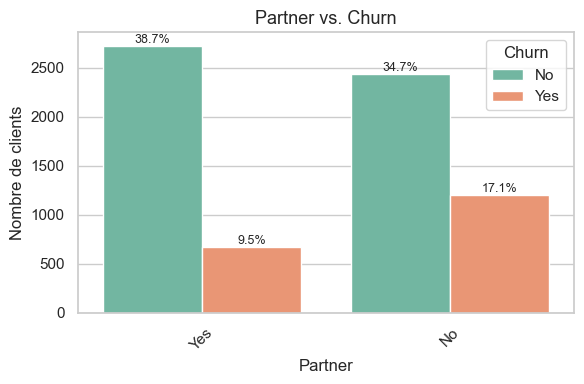

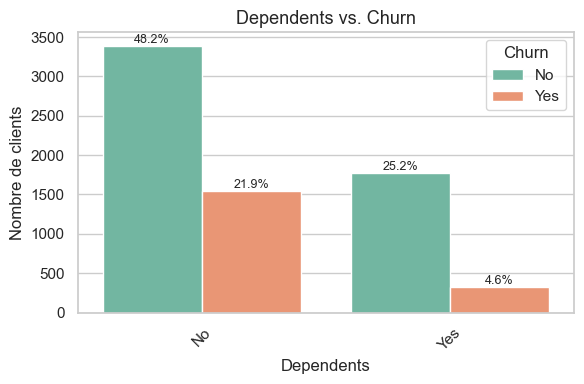

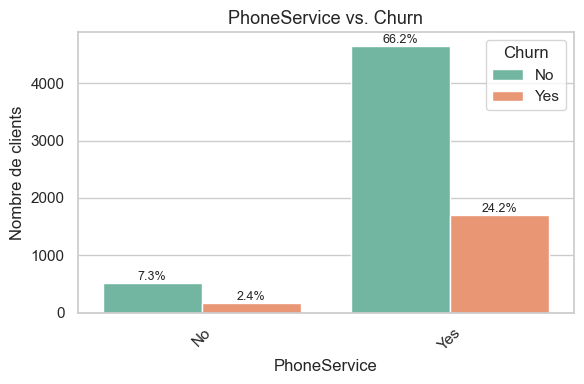

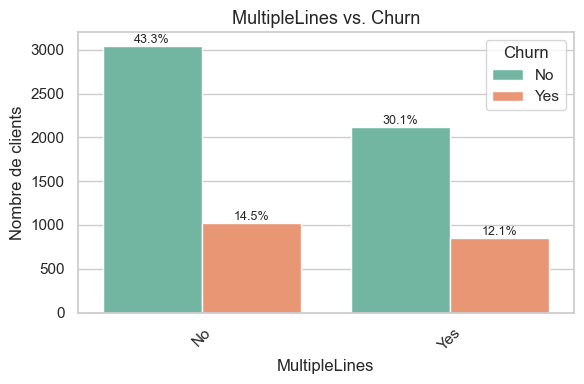

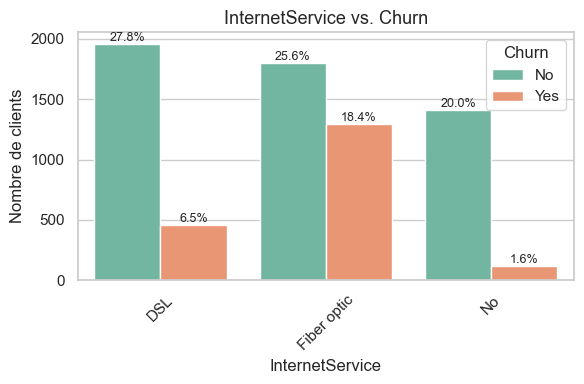

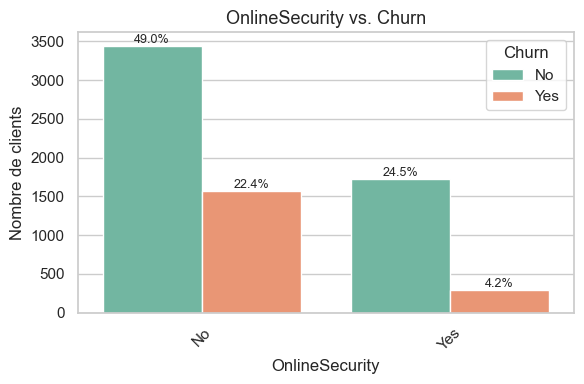

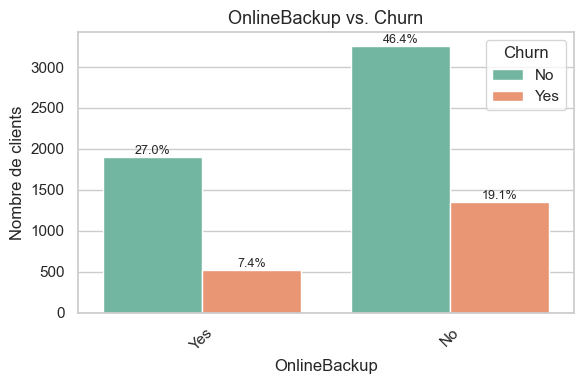

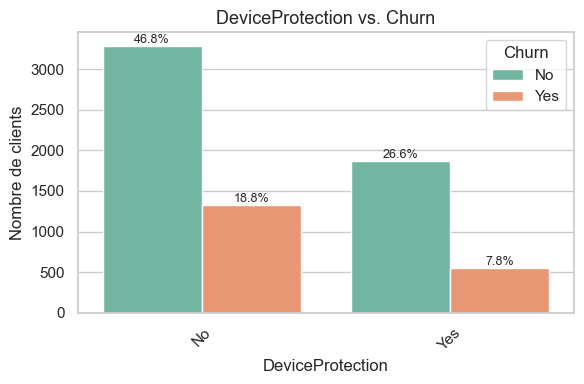

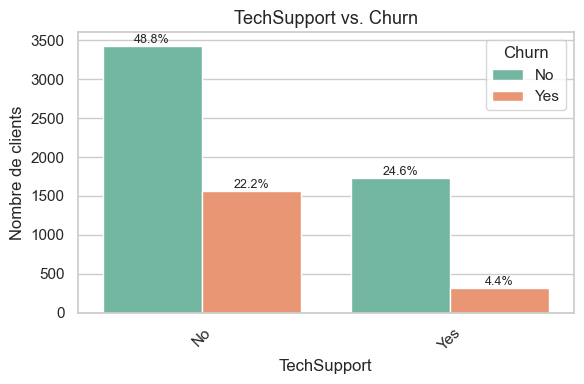

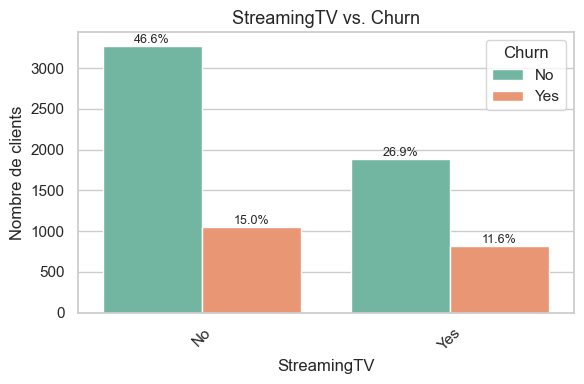

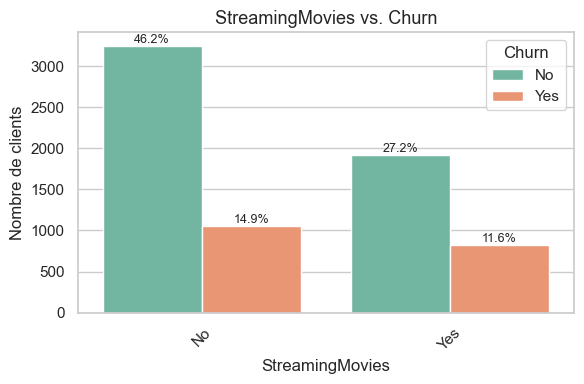

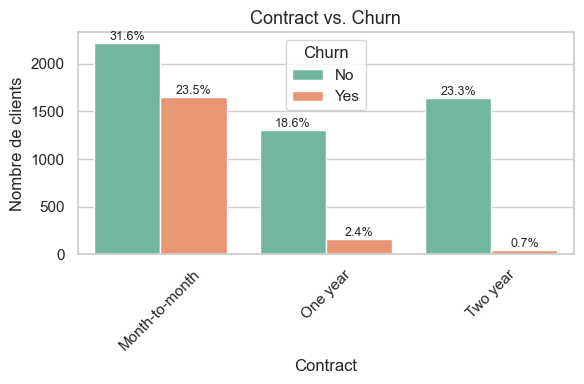

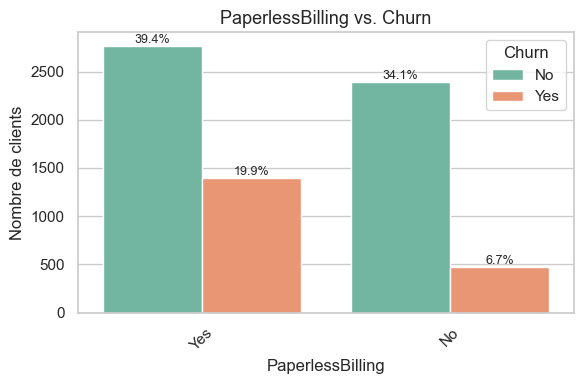

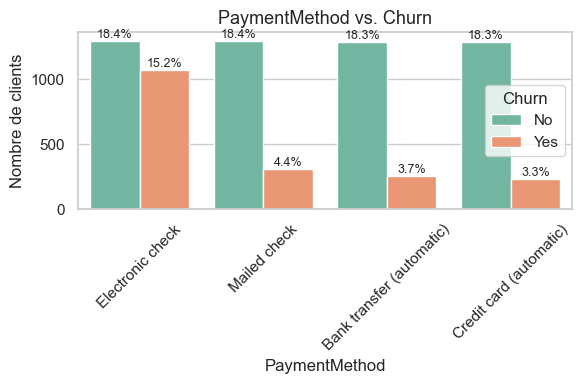

🧪 Résultats du test Khi² d’indépendance :


,Variable,Chi² statistic,p-value,Degrees of freedom
1,SeniorCitizen,158.441,0.00000,1
2,Partner,157.503,0.00000,1
3,Dependents,186.322,0.00000,1
6,InternetService,728.696,0.00000,2
7,OnlineSecurity,205.416,0.00000,1
8,OnlineBackup,47.247,0.00000,1
9,DeviceProtection,30.496,0.00000,1
10,TechSupport,189.967,0.00000,1
11,StreamingTV,27.842,0.00000,1
12,StreamingMovies,25.764,0.00000,1



✅ 14 variables qualitatives sont significativement associées au churn :
📌 SeniorCitizen, Partner, Dependents, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MultipleLines


In [87]:
# 📥 Import des bibliothèques nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# 📌 Liste des variables qualitatives à analyser
qual_vars = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]
target = 'Churn'

# 📊 1. Visualisation : Countplots avec pourcentages
for var in qual_vars:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=var, hue=target, data=df, palette='Set2')
    plt.title(f'{var} vs. Churn', fontsize=13)
    plt.xlabel(var)
    plt.ylabel('Nombre de clients')

    # Annoter les pourcentages
    total = df.shape[0]
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{100 * height / total:.1f}%', 
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 🧪 2. Tests Khi² d’indépendance
chi2_results = []
for var in qual_vars:
    table = pd.crosstab(df[var], df[target])
    stat, p, dof, expected = chi2_contingency(table)
    chi2_results.append({
        'Variable': var,
        'Chi² statistic': round(stat, 3),
        'p-value': round(p, 5),
        'Degrees of freedom': dof
    })

# 📋 3. Résultats triés par p-value (affichage propre)
chi2_df = pd.DataFrame(chi2_results).sort_values(by='p-value')

print("🧪 Résultats du test Khi² d’indépendance :")
display(chi2_df)
# 💬 Synthèse : variables significatives
signif_vars = chi2_df[chi2_df['p-value'] < 0.05]['Variable'].tolist()
print(f"\n✅ {len(signif_vars)} variables qualitatives sont significativement associées au churn :")
print("📌", ', '.join(signif_vars))



### 📋 Résultats du test Khi² d’indépendance

| Rang | Variable           | Statistique de Khi² | p-value  |
|------|--------------------|---------------------|----------|
| 1    | Contract           | 1179.55             | 0.00000  |
| 2    | OnlineSecurity     | 205.42              | 0.00000  |
| 3    | TechSupport        | 189.97              | 0.00000  |
| 4    | InternetService    | 728.70              | 0.00000  |
| 5    | PaymentMethod      | 645.43              | 0.00000  |
| 6    | OnlineBackup       | 47.25               | 0.00000  |
| 7    | DeviceProtection   | 30.50               | 0.00000  |
| 8    | StreamingMovies    | 25.76               | 0.00000  |
| 9    | StreamingTV        | 27.84               | 0.00000  |
| 10   | Dependents         | 186.32              | 0.00000  |
| 11   | Partner            | 157.50              | 0.00000  |
| 12   | SeniorCitizen      | 158.44              | 0.00000  |
| 13   | PaperlessBilling   | 256.88              | 0.00000  |
| 14   | MultipleLines      | 11.09               | 0.00087  |
| 15   | PhoneService       | 0.87                | 0.34992  |
| 16   | gender             | 0.48                | 0.49049  |

---

### ✅ Interprétation

- **14 variables** présentent une **p-value < 0.05**, ce qui signifie qu’elles sont **significativement associées** à la probabilité de churn.
- Les variables les plus influentes sont :
  - `Contract` : le type de contrat est un **facteur clé**. Les clients avec un **contrat mensuel** ont un taux de churn bien plus élevé.
  - `OnlineSecurity`, `TechSupport`, `InternetService` : l’absence de services numériques est **fortement corrélée** à un churn plus élevé.
  - `PaymentMethod` et `PaperlessBilling` : les modalités de paiement influencent également le comportement des clients.

- En revanche :
  - `gender` et `PhoneService` ont des p-values > 0.05 : **aucune preuve statistique de relation avec le churn**. Ces variables pourraient être **éliminées** ou **dépriorisées** dans la suite.

---

> Cette analyse statistique permet d'**orienter le travail de sélection de variables** pour la modélisation. Les modalités les plus discriminantes seront ensuite encodées (One-Hot, Ordinal, etc.) et testées dans des modèles de machine learning.


# 🧹 3. Préparation des données pour la modélisation du **churn**

Avant de passer à la phase de modélisation, il est essentiel de **préparer soigneusement les données**. Cette étape garantit la qualité des résultats et permet d'entraîner des modèles robustes et interprétables.

---

## 🎯 Objectifs de cette étape

- Nettoyer et transformer les données en un format exploitable par les algorithmes de Machine Learning.
- Gérer correctement les types de variables (numériques vs catégorielles).
- Appliquer les bonnes techniques de transformation : encodage, normalisation, séparation des données, etc.
- Créer un ensemble d'entraînement et un ensemble de test pour une **évaluation fiable** des performances.

---

### 1. 🔤 **Encodage des variables catégorielles**

Les algorithmes de machine learning exigent des **variables numériques**.

- **Encodage binaire** pour les variables à deux modalités (`Yes/No`, `Male/Female`, etc.).
- **Encodage One-Hot** pour les variables à plus de deux modalités (`InternetService`, `Contract`, `PaymentMethod`, etc.).

---

### 2. 🎯 **Conversion de la variable cible (`Churn`)**

La variable cible est convertie en variable binaire :

- `Churn = Yes` → 1  
- `Churn = No` → 0

---

### 3. ⚖️ **Mise à l’échelle des variables quantitatives**

Les variables numériques comme `tenure`, `MonthlyCharges` et `TotalCharges` sont **normalisées** ou **standardisées** pour :

- éviter les biais liés aux différences d’échelle,
- améliorer la performance et la vitesse de convergence des algorithmes.

---

### 4. ✂️ **Séparation du dataset**

Découpage du jeu de données en deux sous-ensembles :

- **Ensemble d'entraînement** (70% à 80%) : utilisé pour entraîner les modèles.
- **Ensemble de test** (20% à 30%) : utilisé pour évaluer les performances sur des données **jamais vues**.

---

## ✅ Résultat attendu

Un dataset **propre, entièrement numérique et structuré**, prêt à être injecté dans des modèles de classification (logistique, arbres de décision, forêts aléatoires, etc.).

> 🔍 Une **préparation rigoureuse** des données maximise les chances de construire un modèle performant et stable, tout en assurant une **meilleure interprétabilité** des facteurs influençant le churn des clients.


In [88]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 🧾 Copie du DataFrame original
df_model = df.copy()

# 🔄 Encodage binaire
df_model['gender'] = df_model['gender'].map({'Male': 1, 'Female': 0})
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df_model[col] = df_model[col].map({'Yes': 1, 'No': 0})

# 🔧 Remplacement des modalités 'No internet service' ou 'No phone service' par 'No'
replace_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_model[replace_cols] = df_model[replace_cols].replace(
    {'No internet service': 'No', 'No phone service': 'No'}
)

# 🧠 Encodage One-Hot
df_model = pd.get_dummies(df_model, columns=[
    'InternetService', 'Contract', 'PaymentMethod',
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
], drop_first=True)

# ⚖️ Mise à l’échelle des variables numériques
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_model[num_cols] = scaler.fit_transform(df_model[num_cols])

# 📂 Split des données
X = df_model.drop("Churn", axis=1)
y = df_model["Churn"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Vérification
print("Dimensions X_train :", X_train.shape)
print("Dimensions X_test  :", X_test.shape)
print("Répartition y_train :\n", y_train.value_counts(normalize=True))


Dimensions X_train : (5625, 23)
Dimensions X_test  : (1407, 23)
Répartition y_train :
 Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64


## ✅ Résultats de la préparation des données

À l’issue de la phase de préparation (encodage des variables qualitatives, normalisation des variables numériques, séparation en ensembles d’entraînement et de test), voici les caractéristiques obtenues :

- 📦 **Dimensions de l’ensemble d’entraînement (`X_train`)** : `(5625, 23)`  
  → Cela signifie que nous disposons de **5625 observations** et de **23 variables explicatives** pour entraîner notre modèle.

- 📦 **Dimensions de l’ensemble de test (`X_test`)** : `(1407, 23)`  
  → L’ensemble de test contient **1407 observations**, soit environ 20% des données totales, conformément à une séparation classique **train/test 80/20**.

- 🎯 **Répartition de la variable cible (`y_train`)** :
  - `Churn = 0` (clients restés) : **73.42%**
  - `Churn = 1` (clients partis) : **26.58%**

---

### ⚠️ Déséquilibre des classes

Cette répartition indique un **déséquilibre modéré**, courant dans les jeux de données de churn. Cela nécessite d’en tenir compte lors de la modélisation afin de ne pas biaiser les prédictions.

Voici quelques **solutions à envisager** :

- ✅ Utilisation d’**algorithmes robustes** au déséquilibre (ex. : `Random Forest`, `XGBoost` avec pondération des classes),
- ✅ Application de **techniques de rééchantillonnage** :  
  - **Sur-échantillonnage** (`SMOTE`, duplication de la classe minoritaire),
  - **Sous-échantillonnage** de la classe majoritaire,
- ✅ Évaluation à l’aide de **métriques adaptées** :
  - `Recall`, `Precision`, `F1-score`, `AUC-ROC`, plutôt que l’`accuracy` seule.

---

> ✅ Ces vérifications assurent que notre dataset est **propre, cohérent et exploitable** pour la phase de modélisation du churn à venir.


## ⚖️  Traitement du déséquilibre des classes

Dans notre jeu de données, la variable cible `Churn` est **déséquilibrée** :

- **Clients non churners (`Churn = 0`)** : environ **73 %**,
- **Clients churners (`Churn = 1`)** : environ **27 %**.

Ce déséquilibre peut entraîner un **biais des modèles de machine learning** qui auront tendance à prédire la classe majoritaire (pas de churn), au détriment de la détection des churners.

---

### 🎯 Pourquoi corriger ce déséquilibre ?

- Améliorer les performances sur la **classe minoritaire** (churners) :
  - en **précision**,
  - en **rappel (recall)**,
  - et en **F1-score**.
- Éviter un modèle qui prédirait toujours "Non churn" pour maximiser l’exactitude.

---

### 🛠️ Méthodes de rééquilibrage

#### 🔁 1. **Sur-échantillonnage de la classe minoritaire (SMOTE)**

- SMOTE (*Synthetic Minority Over-sampling Technique*) génère de **nouvelles observations synthétiques** de la classe minoritaire.
- Il permet d’équilibrer le jeu de données sans supprimer d’observations réelles.

#### 🔻 2. **Sous-échantillonnage de la classe majoritaire**

- Réduit le nombre d’observations de la classe majoritaire.
- Moins recommandé car il peut conduire à une **perte d’information**.

#### ⚖️ 3. **Pondération automatique des classes**

- Utilise des **poids ajustés automatiquement** selon la fréquence des classes.
- Compatible avec de nombreux modèles (ex. : `LogisticRegression`, `RandomForest`, `XGBoost`, etc.) via l’option `class_weight='balanced'`.

---

### ✅ Méthode retenue

> Pour ce projet, nous allons appliquer la méthode **SMOTE** sur les données d’entraînement `X_train` et `y_train`, afin de **générer un échantillon équilibré** et ainsi améliorer la détection des clients susceptibles de churner.


In [89]:
print(X_train.dtypes.value_counts())
print(X_train.dtypes[X_train.dtypes == 'object'])  # Doit être vide


bool       14
int64       5
float64     3
object      1
Name: count, dtype: int64
SeniorCitizen    object
dtype: object


In [90]:
print(X_train["SeniorCitizen"].unique())


[0 1]


In [91]:
X_train["SeniorCitizen"] = X_train["SeniorCitizen"].astype(int)
X_test["SeniorCitizen"] = X_test["SeniorCitizen"].astype(int)


In [92]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Instanciation de SMOTE
smote = SMOTE(random_state=42)

# Sur-échantillonnage
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Vérification des dimensions
print("X_train_res :", X_train_res.shape)
print("y_train_res :", y_train_res.shape)

# Répartition des classes
repartition = pd.Series(y_train_res).value_counts(normalize=True).rename("proportion").to_frame()
repartition.index.name = "Churn"
print("\nRépartition après SMOTE :")
print(repartition)


X_train_res : (8260, 23)
y_train_res : (8260,)

Répartition après SMOTE :
       proportion
Churn            
0             0.5
1             0.5


### ✅ Résultats après traitement du déséquilibre des classes (SMOTE)

Après l'application de la technique **SMOTE** (*Synthetic Minority Over-sampling Technique*), les données d'entraînement ont été **équilibrées** :

- 📐 **Dimensions des données d'entraînement augmentées** :
  - `X_train_res` : `(8260, 23)`
  - `y_train_res` : `(8260,)`  
  → Cela signifie que de **nouvelles observations synthétiques** de la classe minoritaire (`Churn = 1`) ont été générées pour équilibrer le dataset.

- ⚖️ **Répartition des classes après rééchantillonnage** :
  - `Churn = 0` : **50 %**
  - `Churn = 1` : **50 %**

---

👉 Cet équilibrage est **essentiel** pour éviter que les modèles de classification **ne privilégient excessivement la classe majoritaire** (`Churn = 0`) lors de l’apprentissage.

Il permet d’améliorer la **capacité du modèle à détecter les churners** (clients ayant quitté l’entreprise), ce qui constitue l’objectif principal de notre projet.


## 🎯 4 : Modélisation et prédiction du churn

Après avoir exploré et préparé les données, nous passons à l'étape cruciale du projet : **entraîner des modèles de machine learning** pour prédire si un client va résilier (`Churn = Yes`) ou non (`Churn = No`).

---

### 🔄 Pipeline général de cette phase

1. **Entraînement de plusieurs algorithmes de classification** :
   - 📈 **Régression logistique** : modèle linéaire de base, interprétable.
   - 🌳 **Arbre de décision** : modèle non-linéaire, facile à visualiser.
   - 🌲 **Forêt aléatoire (Random Forest)** : ensemble d'arbres, robuste et performant.
   - 🚀 **XGBoost / LightGBM** : modèles de gradient boosting très performants sur les jeux de données tabulaires.

2. **Évaluation des performances** :
   - 📉 **Matrice de confusion** : nombre de vrais positifs/négatifs et faux positifs/négatifs.
   - 🏆 **F1-score** : équilibre entre précision et rappel.
   - 📈 **Courbe ROC et AUC** : performance globale du modèle.

3. **Sélection du meilleur modèle** :
   - Comparaison des métriques sur le jeu de test.
   - Choix basé sur le **meilleur compromis entre recall et précision**, avec un accent sur la **capacité à détecter les churners**.

4. **Interprétation du modèle retenu** :
   - Analyse de l’**importance des variables** explicatives.
   - Identification des **facteurs de risque majeurs** (ex : type de contrat, ancienneté, montant payé…).

---

> Cette étape vise à **automatiser la détection des clients à risque de churn** pour anticiper leur départ et guider les actions marketing ciblées.


---

## 🧠  Entraînement des modèles de classification

Nous allons entraîner plusieurs **algorithmes de classification supervisée** sur notre jeu de données équilibré afin de prédire la probabilité qu’un client résilie (`Churn = Yes`).

### 🔍 Objectif :
Comparer différents modèles de machine learning afin d’identifier celui qui offre les **meilleures performances prédictives** sur le churn client.

### 🧪 Modèles testés :

1. **Régression logistique**
   - Modèle linéaire simple et interprétable.
   - Sert souvent de **référence de base** dans les problèmes de classification binaire.

2. **Arbre de décision (Decision Tree)**
   - Modèle non-linéaire basé sur des règles de segmentation.
   - Intéressant pour sa capacité à capturer des **relations complexes** et à fournir une interprétation visuelle.

3. **Forêt aléatoire (Random Forest)**
   - Ensemble d’arbres de décision entraînés sur des sous-échantillons.
   - Robuste, réduit le **sur-apprentissage**, souvent très performant.

4. **(Optionnel) XGBoost / LightGBM**
   - Méthodes de **Gradient Boosting** très efficaces pour les données tabulaires.
   - Souvent **gagnants en compétition** de machine learning.

---

> Cette étape permettra de **sélectionner le modèle le plus adapté** au problème du churn, sur la base de critères objectifs (précision, rappel, F1-score, AUC).


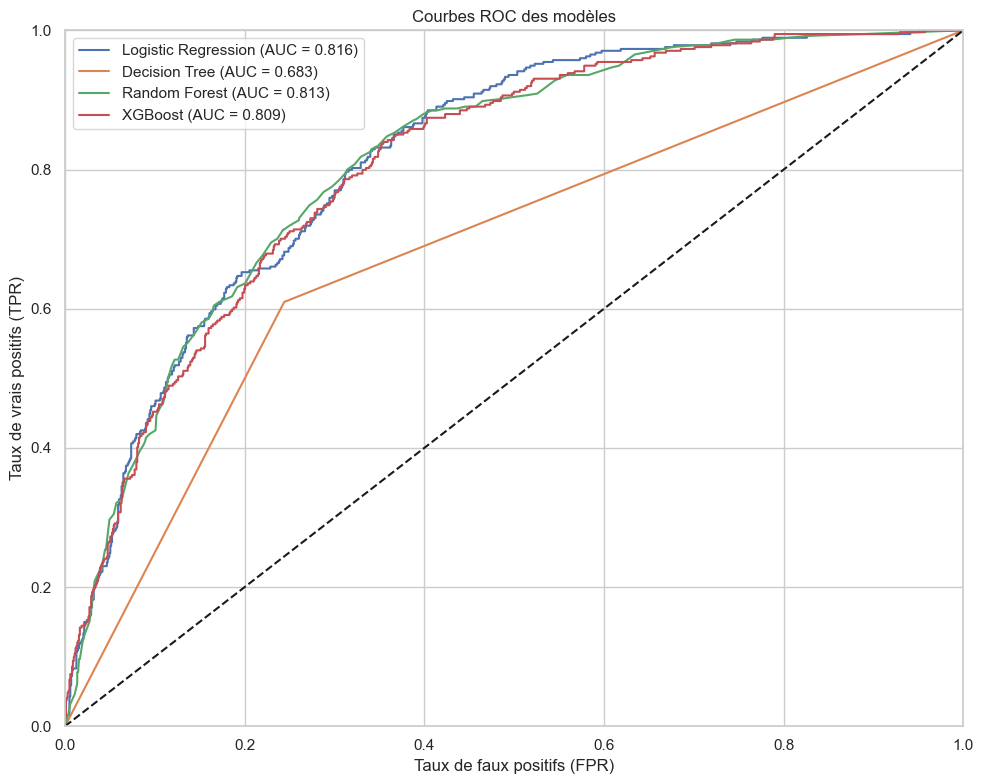

,Modèle,F1-score (CV),AUC
0,Random Forest,0.851,0.813
1,XGBoost,0.827,0.809
2,Logistic Regression,0.798,0.816
3,Decision Tree,0.772,0.683


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Liste des modèles à tester
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []

plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Cross-validation F1-score sur les données d'entraînement SMOTE
    f1 = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='f1').mean()

    # Entraînement sur les données SMOTE et prédiction proba sur les données test
    model.fit(X_train_res, y_train_res)
    y_proba = model.predict_proba(X_test)[:, 1]

    # AUC
    auc = roc_auc_score(y_test, y_proba)

    # Courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

    # Stockage des résultats
    results.append({"Modèle": name, "F1-score (CV)": f1, "AUC": auc})

# Configuration du graphe ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbes ROC des modèles')
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

# Résultats triés par F1-score
df_results = pd.DataFrame(results).sort_values(by="F1-score (CV)", ascending=False).reset_index(drop=True)
df_results.style.format({"F1-score (CV)": "{:.3f}", "AUC": "{:.3f}"})


## 📊 Analyse des résultats des modèles de classification

### 🎯 Objectif rappelé :
Comparer les performances des modèles de machine learning sur le **problème de prédiction du churn client**, en s’appuyant sur des **indicateurs de performance** tels que le **F1-score**, l’**AUC**, et les métriques classiques issues de la matrice de confusion.

---

### ✅ Résultats clés :

| Modèle                   | F1-score (CV) | AUC     | Accuracy | Rappel churn (classe 1) | Précision churn (classe 1) |
|--------------------------|---------------|---------|----------|--------------------------|-----------------------------|
| **Random Forest**        | **0.8507**    | 0.8130  | 76%      | 0.63                     | 0.54                        |
| **XGBoost**              | 0.8266        | 0.8088  | 75%      | 0.65                     | 0.52                        |
| **Logistic Regression**  | 0.7979        | **0.8165** | 73%   | 0.71                     | 0.49                        |
| **Decision Tree**        | 0.7718        | 0.6828  | 72%      | 0.61                     | 0.47                        |

---

### 🔍 Interprétation :

- 🔹 **Random Forest** est le modèle le plus performant en termes de **F1-score**, ce qui indique un bon équilibre entre la précision et le rappel. Il obtient aussi un bon **AUC** (0.813), signe d’une bonne capacité à discriminer entre churners et non-churners.
  
- 🔹 **XGBoost** suit de près avec un F1-score élevé et une performance comparable. Il détecte légèrement mieux les churners (recall de 0.65), mais avec un peu moins de précision (0.52).

- 🔹 **Régression logistique** surprend avec un **AUC** légèrement supérieur (0.8165), mais une **précision très faible (0.49)** sur les churners. Cela signifie qu’elle **identifie correctement beaucoup de churners** (recall = 0.71), mais au **prix de nombreux faux positifs**.

- 🔹 **L’arbre de décision** est le modèle le moins performant, avec les scores les plus faibles en F1-score et en AUC. Il souffre visiblement d’un **sur-apprentissage** et d’une **généralisation plus faible**.

---

### 🏆 Conclusion :
> Le **Random Forest** apparaît comme le **modèle le plus robuste et équilibré** pour prédire le churn client dans notre contexte. Il combine de bonnes performances en cross-validation, un AUC élevé, et un bon compromis entre précision et rappel sur la classe minoritaire.


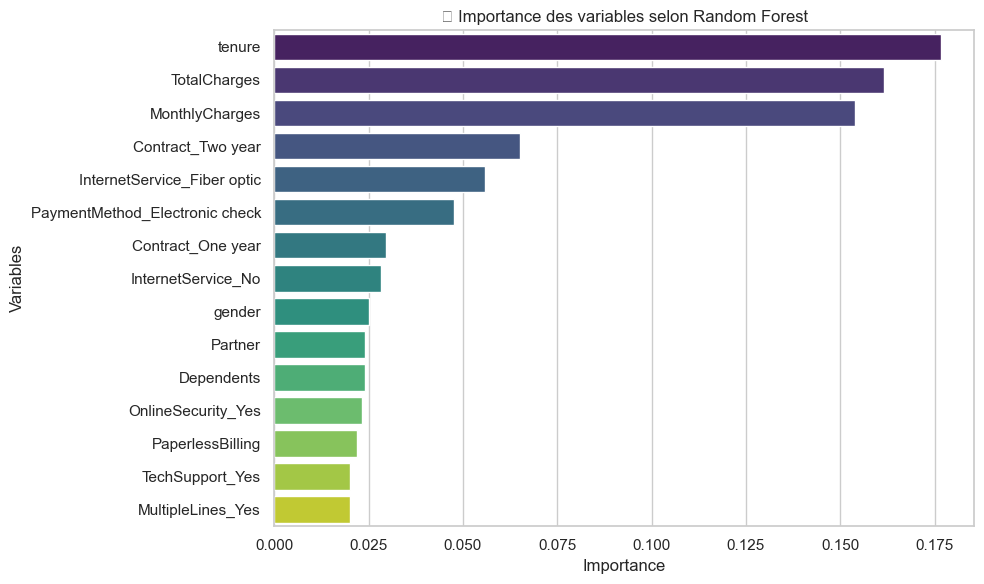

In [94]:
# Récupération des importances
best_model = models["Random Forest"]
importances = best_model.feature_importances_
feature_names = X_train.columns
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Affichage graphique
plt.figure(figsize=(10, 6))
sns.barplot(
    x=feat_importances[:15].values,
    y=feat_importances.index[:15],
    palette=sns.color_palette("viridis", n_colors=15),
)

plt.title("🌟 Importance des variables selon Random Forest")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

## 🌲 Interprétation du modèle retenu – Importance des variables (Random Forest)

Après avoir identifié **Random Forest** comme le modèle le plus performant, nous analysons l’**importance des variables** qu’il utilise pour prédire le churn client.

### 📊 Visualisation :
Le graphique ci-dessus montre l’influence relative de chaque variable dans les décisions du modèle.

---

### ✅ Variables les plus influentes :

- **`tenure`** : C’est la variable la plus déterminante. Elle reflète l’ancienneté du client. Les clients récents ont tendance à résilier plus souvent.
- **`TotalCharges`** & **`MonthlyCharges`** : Ces deux variables liées aux coûts jouent un rôle central. Un client qui paie plus est souvent plus exigeant ou plus prompt à partir.
- **`Contract_Two year`** : Les clients engagés sur deux ans sont beaucoup moins enclins à résilier.
- **`InternetService_Fiber optic`** : Bien que performant, ce service est parfois lié à un plus grand taux de churn, probablement en raison de son coût.
- **`PaymentMethod_Electronic check`** : Les clients utilisant ce mode de paiement présentent souvent un comportement plus volatil.

---

### 📌 Autres observations :

- Les variables **démographiques** (`gender`, `Partner`, `Dependents`) ont un impact plus faible.
- Les options liées aux **services** (`OnlineSecurity_Yes`, `TechSupport_Yes`, `MultipleLines_Yes`) influencent modérément le churn.

---

### 🧠 Conclusion :
> Le modèle Random Forest met en évidence des facteurs contractuels, tarifaires et comportementaux comme **déterminants majeurs du churn**. Ces insights peuvent être utilisés pour cibler les clients à risque avec des actions marketing spécifiques (réduction de coût, offres de fidélité, réengagement contractuel, etc.).


### 💾 Sauvegarde du modèle entraîné

Avant de passer à l'application sur de nouveaux clients, nous sauvegardons le modèle `RandomForest` sélectionné à l'aide de `joblib`, afin de pouvoir le recharger dans une future application Streamlit.


In [98]:
import joblib

# Sauvegarde du modèle RandomForest entraîné
joblib.dump(best_model, 'model.pkl')

# Vérification
print("✅ Modèle sauvegardé dans model.pkl")


✅ Modèle sauvegardé dans model.pkl


## 📦 5: Application du modèle sur de nouveaux clients

Après avoir entraîné et sélectionné le meilleur modèle (ici, la **Random Forest**), cette étape consiste à **l’utiliser concrètement** pour faire des prédictions sur **de nouveaux clients**, et en tirer des **recommandations d’actions ciblées**.

---

### 🎯 Objectif :

- Prédire pour chaque nouveau client la **probabilité de churn** (`P(Churn = Yes)`).
- Identifier les **clients à risque élevé**.
- Définir une **stratégie d’intervention** adaptée selon le niveau de risque (ex. : offre promotionnelle, appel de rétention, etc.).

---

### 🧪 Mise en application :

- À défaut de nouvelles données réelles, on applique ici le modèle sur l’ensemble **`X_test`**.
- Pour chaque client :
  - On calcule la **probabilité de churn** à l’aide de la méthode `predict_proba()`.
  - On applique un **seuil de classification** (ici **0.5**) pour prédire si le client va churner (`Churn = 1`) ou non (`Churn = 0`).

---


In [95]:
# Application du modèle sur les clients du jeu de test
X_test["Churn_Proba"] = best_model.predict_proba(X_test)[:, 1]
X_test["Churn_Pred"] = (X_test["Churn_Proba"] > 0.5).astype(int)

#### Afficher les probabilités et prédictions

In [96]:
# Affichage des 10 premières prédictions
X_test[["Churn_Proba", "Churn_Pred"]].head(10)

,Churn_Proba,Churn_Pred
974,0.02,0
619,0.89,1
4289,0.11,0
3721,0.15,0
4533,0.35,0
445,0.31,0
5898,0.03,0
3387,0.30,0
1346,0.81,1
5690,0.00,0


### 🧪 Application du modèle sur de nouveaux clients

À défaut de disposer de véritables nouveaux clients, nous avons appliqué le **modèle Random Forest** sur les données de test `X_test` (non vues à l’entraînement). Pour chaque client, le modèle calcule :

- **`Churn_Proba`** : la **probabilité prédite** de résiliation (entre 0 et 1).
- **`Churn_Pred`** : la **prédiction binaire** (`1 = churn`, `0 = non churn`) basée sur un **seuil de 0.5**.

---

### 📊 Extrait des résultats obtenus :

| ID Client | Probabilité de churn (`Churn_Proba`) | Prédiction (`Churn_Pred`) |
|-----------|---------------------------------------|-----------------------------|
| 974       | 0.02                                  | 0                           |
| 619       | 0.89                                  | 1                           |
| 4289      | 0.11                                  | 0                           |
| 3721      | 0.15                                  | 0                           |
| 4533      | 0.35                                  | 0                           |
| 445       | 0.31                                  | 0                           |
| 5898      | 0.03                                  | 0                           |
| 3387      | 0.30                                  | 0                           |
| 1346      | 0.81                                  | 1                           |
| 5690      | 0.00                                  | 0                           |

---

### 🧠 Interprétation :

- Les clients ayant une **probabilité faible (< 0.5)** sont **considérés comme fidèles** (`Churn_Pred = 0`).
- Les clients avec une **probabilité élevée (> 0.5)** sont **identifiés comme à risque de résiliation** (`Churn_Pred = 1`).

**Exemples :**
- Le client **n°619** a une probabilité de churn de **0.89** → il est **très probablement sur le point de résilier**.
- Le client **n°974** a une probabilité très faible (**0.02**) → il est **considéré comme fidèle**.

---

> ✅ Cette étape permet de **prioriser les efforts marketing** sur les clients à risque, et d’anticiper les pertes potentielles de revenus.

➡️ **Prochaine étape** : identifier les **clients les plus à risque** pour construire une **stratégie d'action personnalisée**.


## 🔍 Vérification des prédictions sur les clients test

Avant de définir une stratégie d’action, il est crucial de **comparer les prédictions du modèle aux valeurs réelles** de la variable `Churn` dans les données de test.

Cela permet de :

- ✅ **Évaluer la fiabilité du modèle** sur des cas concrets.
- ❌ Repérer les éventuelles **erreurs de prédiction** (faux positifs / faux négatifs).
- 📊 Mieux comprendre **dans quels cas le modèle se trompe**, pour ajuster la stratégie d’intervention.

---

### 📌 Objectif :

Comparer pour chaque client :
- La **probabilité prédite** (`Churn_Proba`)
- La **prédiction binaire** (`Churn_Pred`)
- La **valeur réelle** (`Churn_True`)
- Et identifier les **erreurs de prédiction**.

---


In [97]:
# Copier X_test et y_test pour les enrichir
X_test_results = X_test.copy()
X_test_results["Churn_True"] = y_test.values

# Ajouter une colonne indiquant si la prédiction est correcte ou non
X_test_results["Erreur"] = X_test_results["Churn_Pred"] != X_test_results["Churn_True"]

# Afficher un aperçu des résultats
X_test_results[["Churn_Proba", "Churn_Pred", "Churn_True", "Erreur"]].head(10)


,Churn_Proba,Churn_Pred,Churn_True,Erreur
974,0.02,0,0,False
619,0.89,1,0,True
4289,0.11,0,0,False
3721,0.15,0,1,True
4533,0.35,0,0,False
445,0.31,0,1,True
5898,0.03,0,0,False
3387,0.30,0,0,False
1346,0.81,1,1,False
5690,0.00,0,0,False


### 🧪 Analyse des prédictions vs réalité

Voici un extrait des résultats croisant :

- **`Churn_Proba`** : probabilité prédite par le modèle.
- **`Churn_Pred`** : prédiction binaire basée sur un seuil de 0.5.
- **`Churn_True`** : valeur réelle observée dans les données de test.
- **`Erreur`** : indique si la prédiction est correcte (`False`) ou erronée (`True`).

| ID Client | Churn_Proba | Churn_Pred | Churn_True | Erreur        |
|-----------|-------------|------------|------------|---------------|
| 974       | 0.02        | 0          | 0          | ❌ Non        |
| 619       | 0.89        | 1          | 0          | ✅ Oui *(faux positif)* |
| 4289      | 0.11        | 0          | 0          | ❌ Non        |
| 3721      | 0.15        | 0          | 1          | ✅ Oui *(faux négatif)* |
| 4533      | 0.35        | 0          | 0          | ❌ Non        |
| 445       | 0.31        | 0          | 1          | ✅ Oui *(faux négatif)* |
| 5898      | 0.03        | 0          | 0          | ❌ Non        |
| 3387      | 0.30        | 0          | 0          | ❌ Non        |
| 1346      | 0.81        | 1          | 1          | ❌ Non        |
| 5690      | 0.00        | 0          | 0          | ❌ Non        |

---

### 🧠 Interprétation :

- ✅ Le modèle fait des **prédictions correctes** dans la majorité des cas (**7 sur 10** dans cet échantillon).
- ❌ Il existe des **erreurs notables** :
  - **Faux positifs** : exemple du **client 619**, prédit comme churner alors qu’il reste fidèle.
  - **Faux négatifs** : exemples des **clients 3721 et 445**, prévus comme fidèles alors qu’ils vont résilier.
- 🎯 Ces erreurs sont **critiques à comprendre** pour :
  - ajuster éventuellement le **seuil de décision** (par exemple le baisser à 0.4),
  - ou adapter les **actions marketing** (par exemple : offrir une réduction même si la proba est modérée).

---

> 🧩 Cette analyse est un **pont essentiel entre la modélisation et la stratégie business**. Elle permet de ne pas se reposer aveuglément sur les prédictions, mais de les **contextualiser avec**


## 🎯 6 : Stratégies marketing basées sur le niveau de risque

Après avoir prédit les probabilités de résiliation pour chaque client, il est désormais possible de **mettre en place une stratégie d’intervention personnalisée**, adaptée au **niveau de risque** de churn identifié.

---

### 🎯 Objectif

L’objectif de cette étape est de **traduire les résultats du modèle en actions concrètes** pour améliorer la rétention client. Il ne s’agit plus de faire de la prédiction, mais de passer à l’**action marketing ciblée**.

---

### 🧠 Approche recommandée

On peut segmenter les clients selon leur **probabilité prédite de churn (`Churn_Proba`)** en plusieurs groupes de risque :

| Niveau de risque       | Seuil de probabilité        | Recommandation                          |
|------------------------|-----------------------------|------------------------------------------|
| 🔴 Risque élevé        | > 0.7                       | Action immédiate (offre spéciale, appel personnalisé, etc.) |
| 🟠 Risque modéré       | 0.5 – 0.7                   | Action préventive (email ciblé, enquête satisfaction, etc.) |
| 🟢 Faible risque       | < 0.5                       | Maintien (newsletter, programme fidélité, etc.) |

---

### 📌 Exemple d’actions à envisager

- 🔴 **Clients à très haut risque** :
  - Contact téléphonique direct ou relance personnalisée.
  - Propositions de réductions ou services premium gratuits.
  - Analyse individuelle de leur historique pour détecter les causes du désengagement.

- 🟠 **Clients à risque modéré** :
  - Enquête de satisfaction.
  - Suivi par email avec proposition de services ou contenus utiles.
  - Invitation à participer à un programme d'amélioration continue.

- 🟢 **Clients fidèles (faible risque)** :
  - Maintien de la satisfaction client.
  - Offres de fidélité / parrainage.
  - Suivi moins intensif mais régulier.

---

> ✅ Cette stratégie permet d’**allouer les ressources marketing de manière optimale**, en intervenant en priorité là où le risque est le plus élevé, tout en entretenant la satisfaction des clients fidèles.


## 🧾 7. Conclusion et perspectives

### ✅ Bilan du projet

Ce projet avait pour objectif de **prédire le churn des clients** d’une entreprise à partir de données historiques, afin de **détecter les clients à risque de résiliation** et d’**orienter les actions marketing**.

Les étapes suivantes ont été menées :

1. **Exploration et préparation des données** :
   - Nettoyage, traitement des valeurs manquantes, encodage.
   - Analyses univariée et bivariée pour mieux comprendre les facteurs liés au churn.

2. **Modélisation** :
   - Entraînement de plusieurs modèles (régression logistique, arbre de décision, forêt aléatoire, XGBoost).
   - Le **modèle Random Forest** s’est révélé **le plus performant** avec un bon compromis entre **recall** et **précision**.

3. **Prédictions sur de nouveaux clients** :
   - Application du modèle sur un jeu de test pour évaluer sa robustesse.
   - Attribution d’une **probabilité de churn** à chaque client, permettant de les prioriser selon leur niveau de risque.

4. **Stratégie d’action ciblée** :
   - Clients segmentés en 3 groupes : risque faible, moyen et élevé.
   - Recommandations adaptées à chaque niveau de risque (réductions, appels, enquêtes…).

---

### 🧠 Enseignements clés

- Les **facteurs clés du churn** sont liés à : la durée d’engagement, le type de contrat, le service technique, et les paiements électroniques.
- Le modèle peut être utilisé pour **anticiper les départs** et éviter des pertes de revenus.

---

### 🚀 Recommandations pour l'entreprise

- Intégrer ce modèle dans les **processus marketing** pour identifier et retenir les clients à risque.
- Mettre en place un **tableau de bord de suivi** des prédictions.
- Mettre à jour régulièrement le modèle avec **de nouvelles données** (mensuellement, par exemple).
- Tester l’efficacité des actions ciblées via des **A/B tests**.

---

### 🔮 Perspectives futures

- Déploiement du modèle dans une **application interactive** interne ou publique via **Streamlit**, pour :
  - Visualiser les prédictions en temps réel.
  - Simuler des profils clients.
  - Aider les équipes métier à prendre des décisions rapidement.

- Enrichissement du dataset avec des **données comportementales**, **CRM**, ou de **satisfaction client**.
- Collaboration renforcée entre les équipes **data** et **marketing** pour affiner les stratégies de rétention.

---

> 📌 Ce projet montre comment la **science des données** peut concrètement aider à **réduire le churn**, **augmenter la fidélité client**, et **optimiser les décisions stratégiques**.
